In [1]:
# Jupyter notebook in Jupytext format

## Feature Importance Analysis Notebook with Cross-Dataset Visualizations

This notebook performs comprehensive analysis of feature importance results from the consensus analysis and generates publication-quality visualizations including:
- Matrix plots comparing feature importance across networks and datasets
- Paired comparison plots showing context-dependent importance changes
- SHAP directional impact analysis with natural language titles
- Cross-dataset pattern identification

## Initialisation and Configuration

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to Python path for imports
path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path)
print(f"Project path set to: {os.getcwd()}")

# Add project root to Python path for imports
sys.path.insert(0, project_path)

Project path set to: c:\Github\ode-biomarker-project


In [3]:
from PathLoader import PathLoader #noqa: E402

path_loader = PathLoader("data_config.env", "current_user.env")

In [4]:
from DataLink import DataLink #noqa: E402

data_link = DataLink(path_loader, "data_codes.csv")

In [5]:
folder_name = "ThesisResult-FeatureImportanceGeneSubsets-SHAP"
exp_id = "v1_rf_config1_genesubsets_shap_seeds20_batch4" 

# Create both the main folder and exp_id subfolder
main_folder = f"{path_loader.get_data_path()}data/results/{folder_name}"
exp_folder = f"{main_folder}/{exp_id}"

if not os.path.exists(main_folder):
    os.makedirs(main_folder)
if not os.path.exists(exp_folder):
    os.makedirs(exp_folder)

file_save_path = f"{exp_folder}/"

# Create a new report file for capturing print statements
print_report_path = f"{file_save_path}feature_importance_post_analysis_report_{exp_id}.md"
print_report_file = open(print_report_path, 'w', encoding='utf-8')

# Write header to the print report
print_report_file.write(f"# Feature Importance Analysis Report - {exp_id}\n\n")
import time
print_report_file.write(f"**Generated**: {time.strftime('%Y-%m-%d %H:%M:%S')}\n\n")
print_report_file.write("This report captures all print statements from the feature importance analysis with proper formatting.\n\n")

def save_and_print(message, report_file=None, level="info"):
    """
    Print message to console and save to report file with proper formatting.
    
    Args:
        message: The message to print and save
        report_file: File object to save to (optional)
        level: Formatting level - "header", "section", "subsection", or "info"
    """
    # Print to console
    print(message)
    
    # Save to report with proper formatting
    if report_file:
        if level == "header":
            report_file.write(f"# {message}\n\n")
        elif level == "section":
            report_file.write(f"## {message}\n\n")
        elif level == "subsection":
            report_file.write(f"### {message}\n\n")
        else:  # info level
            report_file.write(f"{message}\n\n")
    
    return message

## Data Loading Block

In [6]:
import pandas as pd
import numpy as np
import sys

# Define expected file patterns based on the file structure for gene subset experiment
file_patterns = [
    "dataset_type_analysis_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl",
    "feature_importance_analysis_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl",
    "shap_consensus_importance_signed_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl",
    "shap_consensus_importance_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl",
    "shap_iteration_importance_signed_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl",
    "shap_iteration_importance_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl"
]

save_and_print("## Data Loading Results", print_report_file, level="section")

# Load datasets with comprehensive error handling
datasets = {}

for pattern in file_patterns:
    file_path = f"{exp_folder}/{pattern}"
    
    # Check if file exists
    if not os.path.exists(file_path):
        save_and_print(f"⚠️  File not found: {file_path}", print_report_file, level="info")
        continue
    
    try:
        # Load the pickle file
        data = pd.read_pickle(file_path)
        dataset_name = pattern.replace(f"_{exp_id}.pkl", "").replace("v1_rf_config1_genesubsets_shap_", "")
        datasets[dataset_name] = data
        
        save_and_print(f"✅ Loaded: {pattern}", print_report_file, level="info")
        
    except Exception as e:
        save_and_print(f"❌ Error loading {pattern}: {str(e)}", print_report_file, level="info")
        save_and_print(f"   Detailed error: {sys.exc_info()[0]}", print_report_file, level="info")

save_and_print(f"📊 Total datasets loaded: {len(datasets)}", print_report_file, level="info")
save_and_print(f"Available datasets: {list(datasets.keys())}", print_report_file, level="info")

# Print RNG seeds used in the experiment
save_and_print("### RNG Seeds Used in Feature Importance Analysis", print_report_file, level="subsection")

if 'feature_importance_analysis' in datasets:
    dataset = datasets['feature_importance_analysis']
    if isinstance(dataset, pd.DataFrame) and 'rng' in dataset.columns:
        rng_seeds = sorted(dataset['rng'].unique())
        save_and_print(f"RNG seeds found: {len(rng_seeds)} unique seeds", print_report_file, level="info")
        save_and_print(f"RNG seed values: {rng_seeds}", print_report_file, level="info")
    else:
        save_and_print("RNG column not found in feature_importance_analysis dataset", print_report_file, level="info")
else:
    save_and_print("feature_importance_analysis dataset not found", print_report_file, level="info")

## Data Loading Results
✅ Loaded: dataset_type_analysis_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
✅ Loaded: feature_importance_analysis_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
✅ Loaded: shap_consensus_importance_signed_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
✅ Loaded: shap_consensus_importance_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
✅ Loaded: shap_iteration_importance_signed_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
✅ Loaded: shap_iteration_importance_v1_rf_config1_genesubsets_shap_seeds20_batch4.pkl
📊 Total datasets loaded: 6
Available datasets: ['dataset_type_analysis', 'feature_importance_analysis', 'shap_consensus_importance_signed', 'shap_consensus_importance', 'shap_iteration_importance_signed', 'shap_iteration_importance']
### RNG Seeds Used in Feature Importance Analysis
RNG seeds found: 20 unique seeds
RNG seed values: [np.int64(769), np.int64(860), np.int64(5311), np.int64(6265), np.int64(15795), np.int64(16023), np.int64(37194), 

## Section 1: Basic Data Statistics

In [7]:
import sys

def get_memory_usage(obj):
    """Get memory usage of an object in MB"""
    return sys.getsizeof(obj) / (1024 * 1024)  # Convert to MB

save_and_print("## Basic Statistics", print_report_file, level="section")

for name, data in datasets.items():
    save_and_print(f"### Dataset: {name}", print_report_file, level="subsection")
    
    # Shape and basic info
    if hasattr(data, 'shape'):
        save_and_print(f"Shape: {data.shape}", print_report_file, level="info")
        if hasattr(data, 'columns'):
            save_and_print(f"Columns: {len(data.columns)}", print_report_file, level="info")
            if len(data.columns) <= 10:
                save_and_print(f"Column names: {list(data.columns)}", print_report_file, level="info")
            else:
                save_and_print(f"First 10 columns: {list(data.columns[:10])}", print_report_file, level="info")
        if hasattr(data, 'index'):
            if isinstance(data.index, pd.MultiIndex):
                save_and_print(f"Index levels: {data.index.nlevels}", print_report_file, level="info")
            else:
                save_and_print(f"Index length: {len(data.index)}", print_report_file, level="info")
                if len(data.index) <= 10:
                    save_and_print(f"Index names: {list(data.index[:10])}", print_report_file, level="info")
    else:
        save_and_print(f"Type: {type(data)}", print_report_file, level="info")
        if isinstance(data, dict):
            save_and_print(f"Dictionary keys: {len(data)}", print_report_file, level="info")
            if len(data) <= 5:
                save_and_print(f"First keys: {list(data.keys())[:5]}", print_report_file, level="info")
    
    # Memory usage
    memory_mb = get_memory_usage(data)
    save_and_print(f"Memory usage: {memory_mb:.2f} MB", print_report_file, level="info")
    
    # Data types (for DataFrames)
    if isinstance(data, pd.DataFrame):
        save_and_print(f"Data types:", print_report_file, level="info")
        dtype_summary = data.dtypes.value_counts()
        for dtype, count in dtype_summary.items():
            save_and_print(f"  {dtype}: {count} columns", print_report_file, level="info")
    
    # Sample data preview
    if isinstance(data, pd.DataFrame) and len(data) > 0:
        save_and_print(f"First few rows:", print_report_file, level="info")
        save_and_print(data.head(3).to_string(), print_report_file, level="info")
    elif isinstance(data, dict) and len(data) > 0:
        first_key = list(data.keys())[0]
        save_and_print(f"First key sample: {first_key}", print_report_file, level="info")
        if isinstance(data[first_key], pd.Series):
            preview_data = data[first_key].head(3) if len(data[first_key]) > 3 else data[first_key]
            save_and_print(f"First key data: {preview_data.to_string()}", print_report_file, level="info")
        else:
            save_and_print(f"First key value type: {type(data[first_key])}", print_report_file, level="info")

## Basic Statistics
### Dataset: dataset_type_analysis
Shape: (6, 6)
Columns: 6
Column names: ['condition', 'network_type', 'dataset_type', 'performance_mean', 'top_features', 'top_importance_scores']
Index length: 6
Index names: [0, 1, 2, 3, 4, 5]
Memory usage: 0.00 MB
Data types:
  object: 5 columns
  float64: 1 columns
First few rows:
                                                  condition network_type dataset_type  performance_mean                                                                                                          top_features                                                                                                                                                                                                    top_importance_scores
0  RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset        cdk46   genesubset          0.286011                                                  [PIK3CG, CCND2, MYC, RB1, CCND1, IRS2, CCNE1, CCND3, PIK3CD, PIK3CA]

Memory usage: 0.73 MB
Data types:
  object: 14 columns
  float64: 4 columns
  int64: 3 columns
First few rows:
     rng                                                 condition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Section 2: Consensus Analysis

In [8]:
save_and_print("## Consensus Analysis", print_report_file, level="section")

# Analyze consensus datasets
consensus_datasets = {k: v for k, v in datasets.items() if 'consensus' in k}

if not consensus_datasets:
    save_and_print("No consensus datasets found in loaded data.", print_report_file, level="info")
else:
    for name, data in consensus_datasets.items():
        save_and_print(f"### Consensus Dataset: {name}", print_report_file, level="subsection")
        
        if isinstance(data, pd.DataFrame):
            # Basic metrics
            save_and_print(f"Total features: {len(data)}", print_report_file, level="info")
            
            # Check if this is a consensus importance dataset
            importance_columns = [col for col in data.columns if 'importance' in col.lower() or 'mean' in col.lower()]
            
            if importance_columns:
                # Analyze top features
                if 'mean_importance' in data.columns:
                    top_feature_col = 'mean_importance'
                elif 'importance_score' in data.columns:
                    top_feature_col = 'importance_score'
                else:
                    # Use the first importance-like column
                    top_feature_col = importance_columns[0]
                
                # Get top 10 features
                top_10 = data.nlargest(10, top_feature_col)
                save_and_print(f"Top 10 features by {top_feature_col}:", print_report_file, level="info")
                for i, (idx, row) in enumerate(top_10.iterrows(), 1):
                    importance_val = row[top_feature_col]
                    if 'std' in data.columns:
                        std_val = row.get('std_importance', row.get('std', 0))
                        save_and_print(f"  {i}. {idx}: {importance_val:.4f} ± {std_val:.4f}", print_report_file, level="info")
                    else:
                        save_and_print(f"  {i}. {idx}: {importance_val:.4f}", print_report_file, level="info")
                
                # Stability metrics
                if 'std_importance' in data.columns and 'mean_importance' in data.columns:
                    cv_scores = data['std_importance'] / data['mean_importance']
                    cv_scores = cv_scores.replace([np.inf, -np.inf], np.nan).dropna()
                    
                    save_and_print(f"Stability metrics:", print_report_file, level="info")
                    save_and_print(f"  - Mean CV (std/mean): {cv_scores.mean():.4f}", print_report_file, level="info")
                    save_and_print(f"  - Std of CV: {cv_scores.std():.4f}", print_report_file, level="info")
                    save_and_print(f"  - Min CV: {cv_scores.min():.4f}", print_report_file, level="info")
                    save_and_print(f"  - Max CV: {cv_scores.max():.4f}", print_report_file, level="info")
                
                # Feature importance distribution
                importance_values = data[top_feature_col]
                save_and_print(f"Importance distribution:", print_report_file, level="info")
                save_and_print(f"  - Mean: {importance_values.mean():.4f}", print_report_file, level="info")
                save_and_print(f"  - Std: {importance_values.std():.4f}", print_report_file, level="info")
                save_and_print(f"  - Min: {importance_values.min():.4f}", print_report_file, level="info")
                save_and_print(f"  - Max: {importance_values.max():.4f}", print_report_file, level="info")
                save_and_print(f"  - Median: {importance_values.median():.4f}", print_report_file, level="info")
                
                # Count features with high/low importance
                high_importance = len(importance_values[importance_values > importance_values.quantile(0.75)])
                low_importance = len(importance_values[importance_values < importance_values.quantile(0.25)])
                save_and_print(f"  - High importance (top 25%): {high_importance} features", print_report_file, level="info")
                save_and_print(f"  - Low importance (bottom 25%): {low_importance} features", print_report_file, level="info")
            
        elif isinstance(data, dict):
            # Handle dictionary format consensus data
            save_and_print(f"Dictionary with {len(data)} features", print_report_file, level="info")
            
            # Convert to DataFrame for analysis if possible
            if all(isinstance(v, dict) for v in data.values()):
                try:
                    df_data = []
                    for feature, metrics in data.items():
                        if isinstance(metrics, dict):
                            row = {'feature': feature}
                            row.update(metrics)
                            df_data.append(row)
                    
                    if df_data:
                        df = pd.DataFrame(df_data)
                        df.set_index('feature', inplace=True)
                        save_and_print(f"Converted to DataFrame with {len(df)} features", print_report_file, level="info")
                        
                        # Analyze similar to DataFrame case
                        importance_cols = [col for col in df.columns if 'importance' in col.lower() or 'mean' in col.lower()]
                        if importance_cols:
                            top_col = importance_cols[0]
                            top_5 = df.nlargest(5, top_col)
                            save_and_print(f"Top 5 features:", print_report_file, level="info")
                            for i, (idx, row) in enumerate(top_5.iterrows(), 1):
                                save_and_print(f"  {i}. {idx}: {row[top_col]:.4f}", print_report_file, level="info")
                except Exception as e:
                    save_and_print(f"Could not convert dictionary to DataFrame: {e}", print_report_file, level="info")

## Consensus Analysis
### Consensus Dataset: shap_consensus_importance_signed
Total features: 699
Top 10 features by mean_importance_signed:
  1. ('RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset', np.str_('CCND3')): 0.0187
  2. ('RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic', np.str_('PI3K_init')): 0.0130
  3. ('RandomForestRegressor_config1_k500_mrmr_cdk46_combined', np.str_('CCND3')): 0.0129
  4. ('RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset', np.str_('CCND1')): 0.0126
  5. ('RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic', np.str_('INSR_tfc')): 0.0097
  6. ('RandomForestRegressor_config1_k500_mrmr_cdk46_combined', np.str_('CCND1')): 0.0092
  7. ('RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic', np.str_('RB_init')): 0.0080
  8. ('RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic', np.str_('RBpp_init')): 0.0075
  9. ('RandomForestRegressor_config1_k500_mrmr_fgfr4_combined', np.str_('FGFR4')): 0.0069
  10. ('RandomForestRegressor_config

## Section 3: SHAP Bidirectional Bar Charts (Individual Conditions)

## SHAP Bidirectional Bar Charts: Positive vs Negative Impact
### Signed SHAP Data Analysis
Available conditions in signed SHAP data: ['RandomForestRegressor_config1_k500_mrmr_cdk46_combined', 'RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic', 'RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset', 'RandomForestRegressor_config1_k500_mrmr_fgfr4_combined', 'RandomForestRegressor_config1_k500_mrmr_fgfr4_dynamic', 'RandomForestRegressor_config1_k500_mrmr_fgfr4_genesubset']
### Analysis for condition: RandomForestRegressor_config1_k500_mrmr_cdk46_combined
Directional effects:
  - Positive effects: 111 features
  - Negative effects: 100 features
  - Neutral effects: 3 features


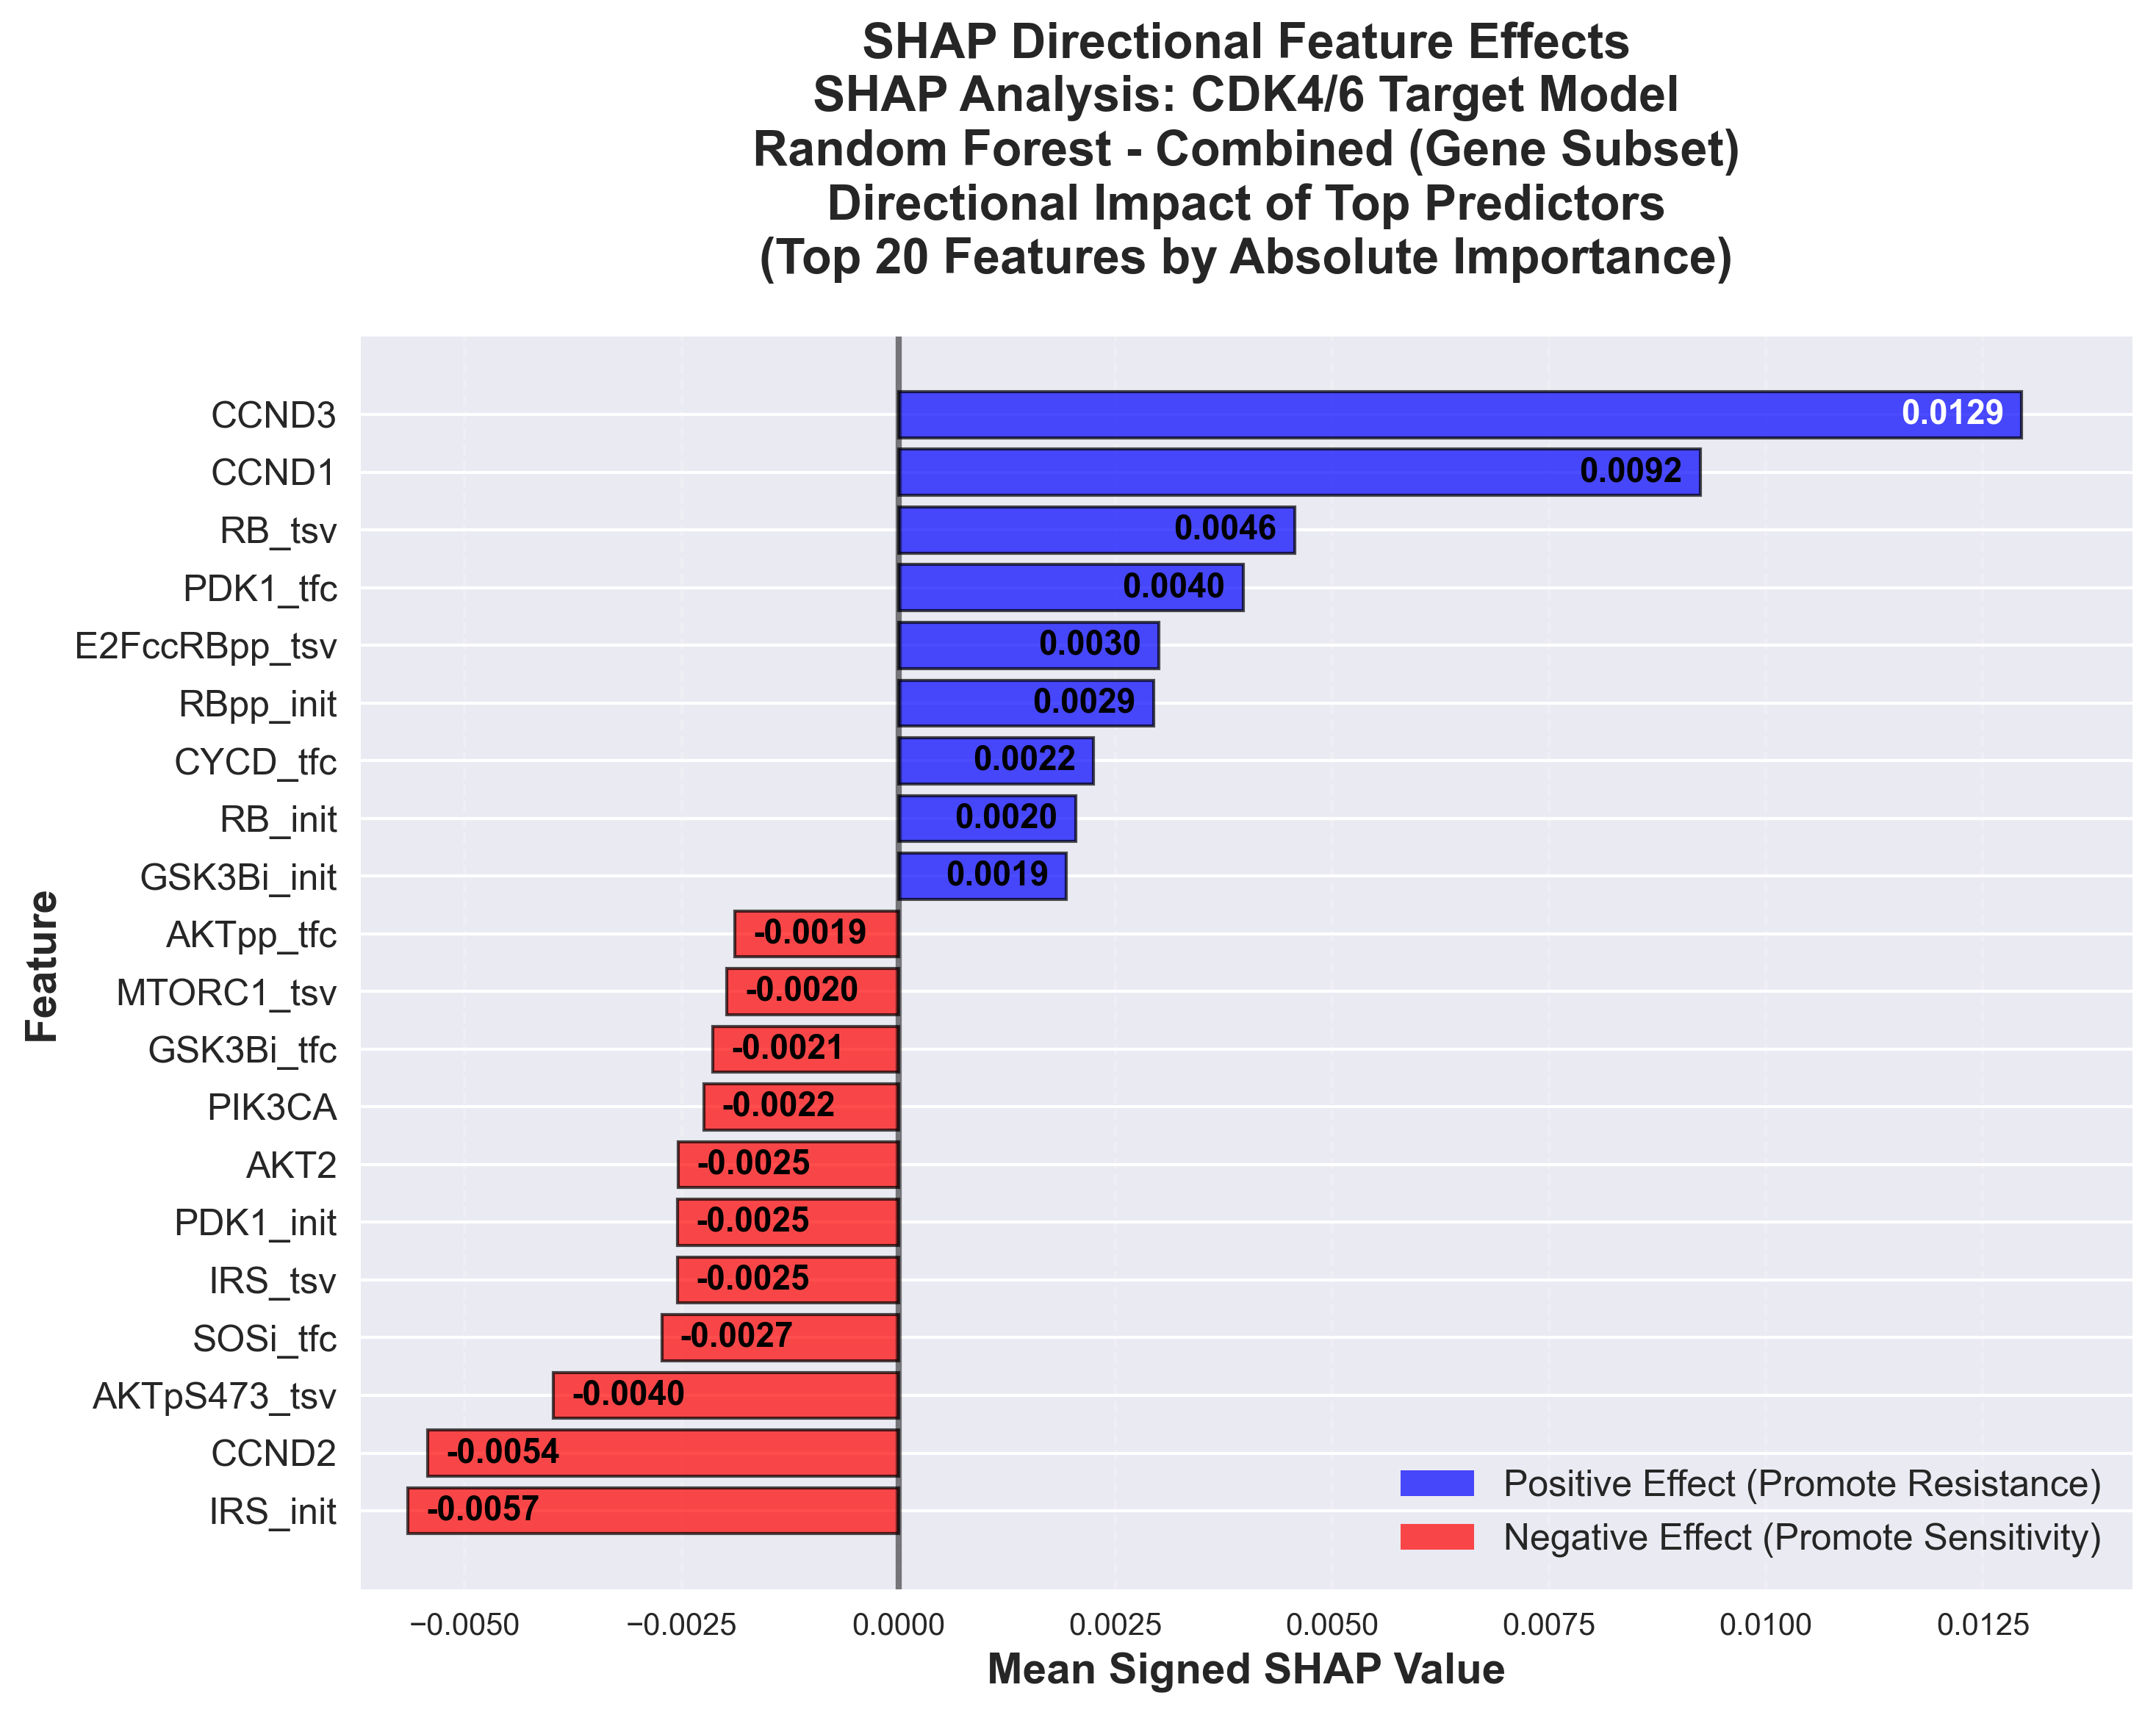

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_cdk46_combined
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_cdk46_combined_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                      mean_importance_signed  std_importance_signed  occurrence_count
condition                                              feature_name                                                                  
RandomForestRegressor_config1_k500_mrmr_cdk46_combined CCND3                        0.012947               0.009302                20
                                                       CCND1                        0.009240               0.015866                20
         

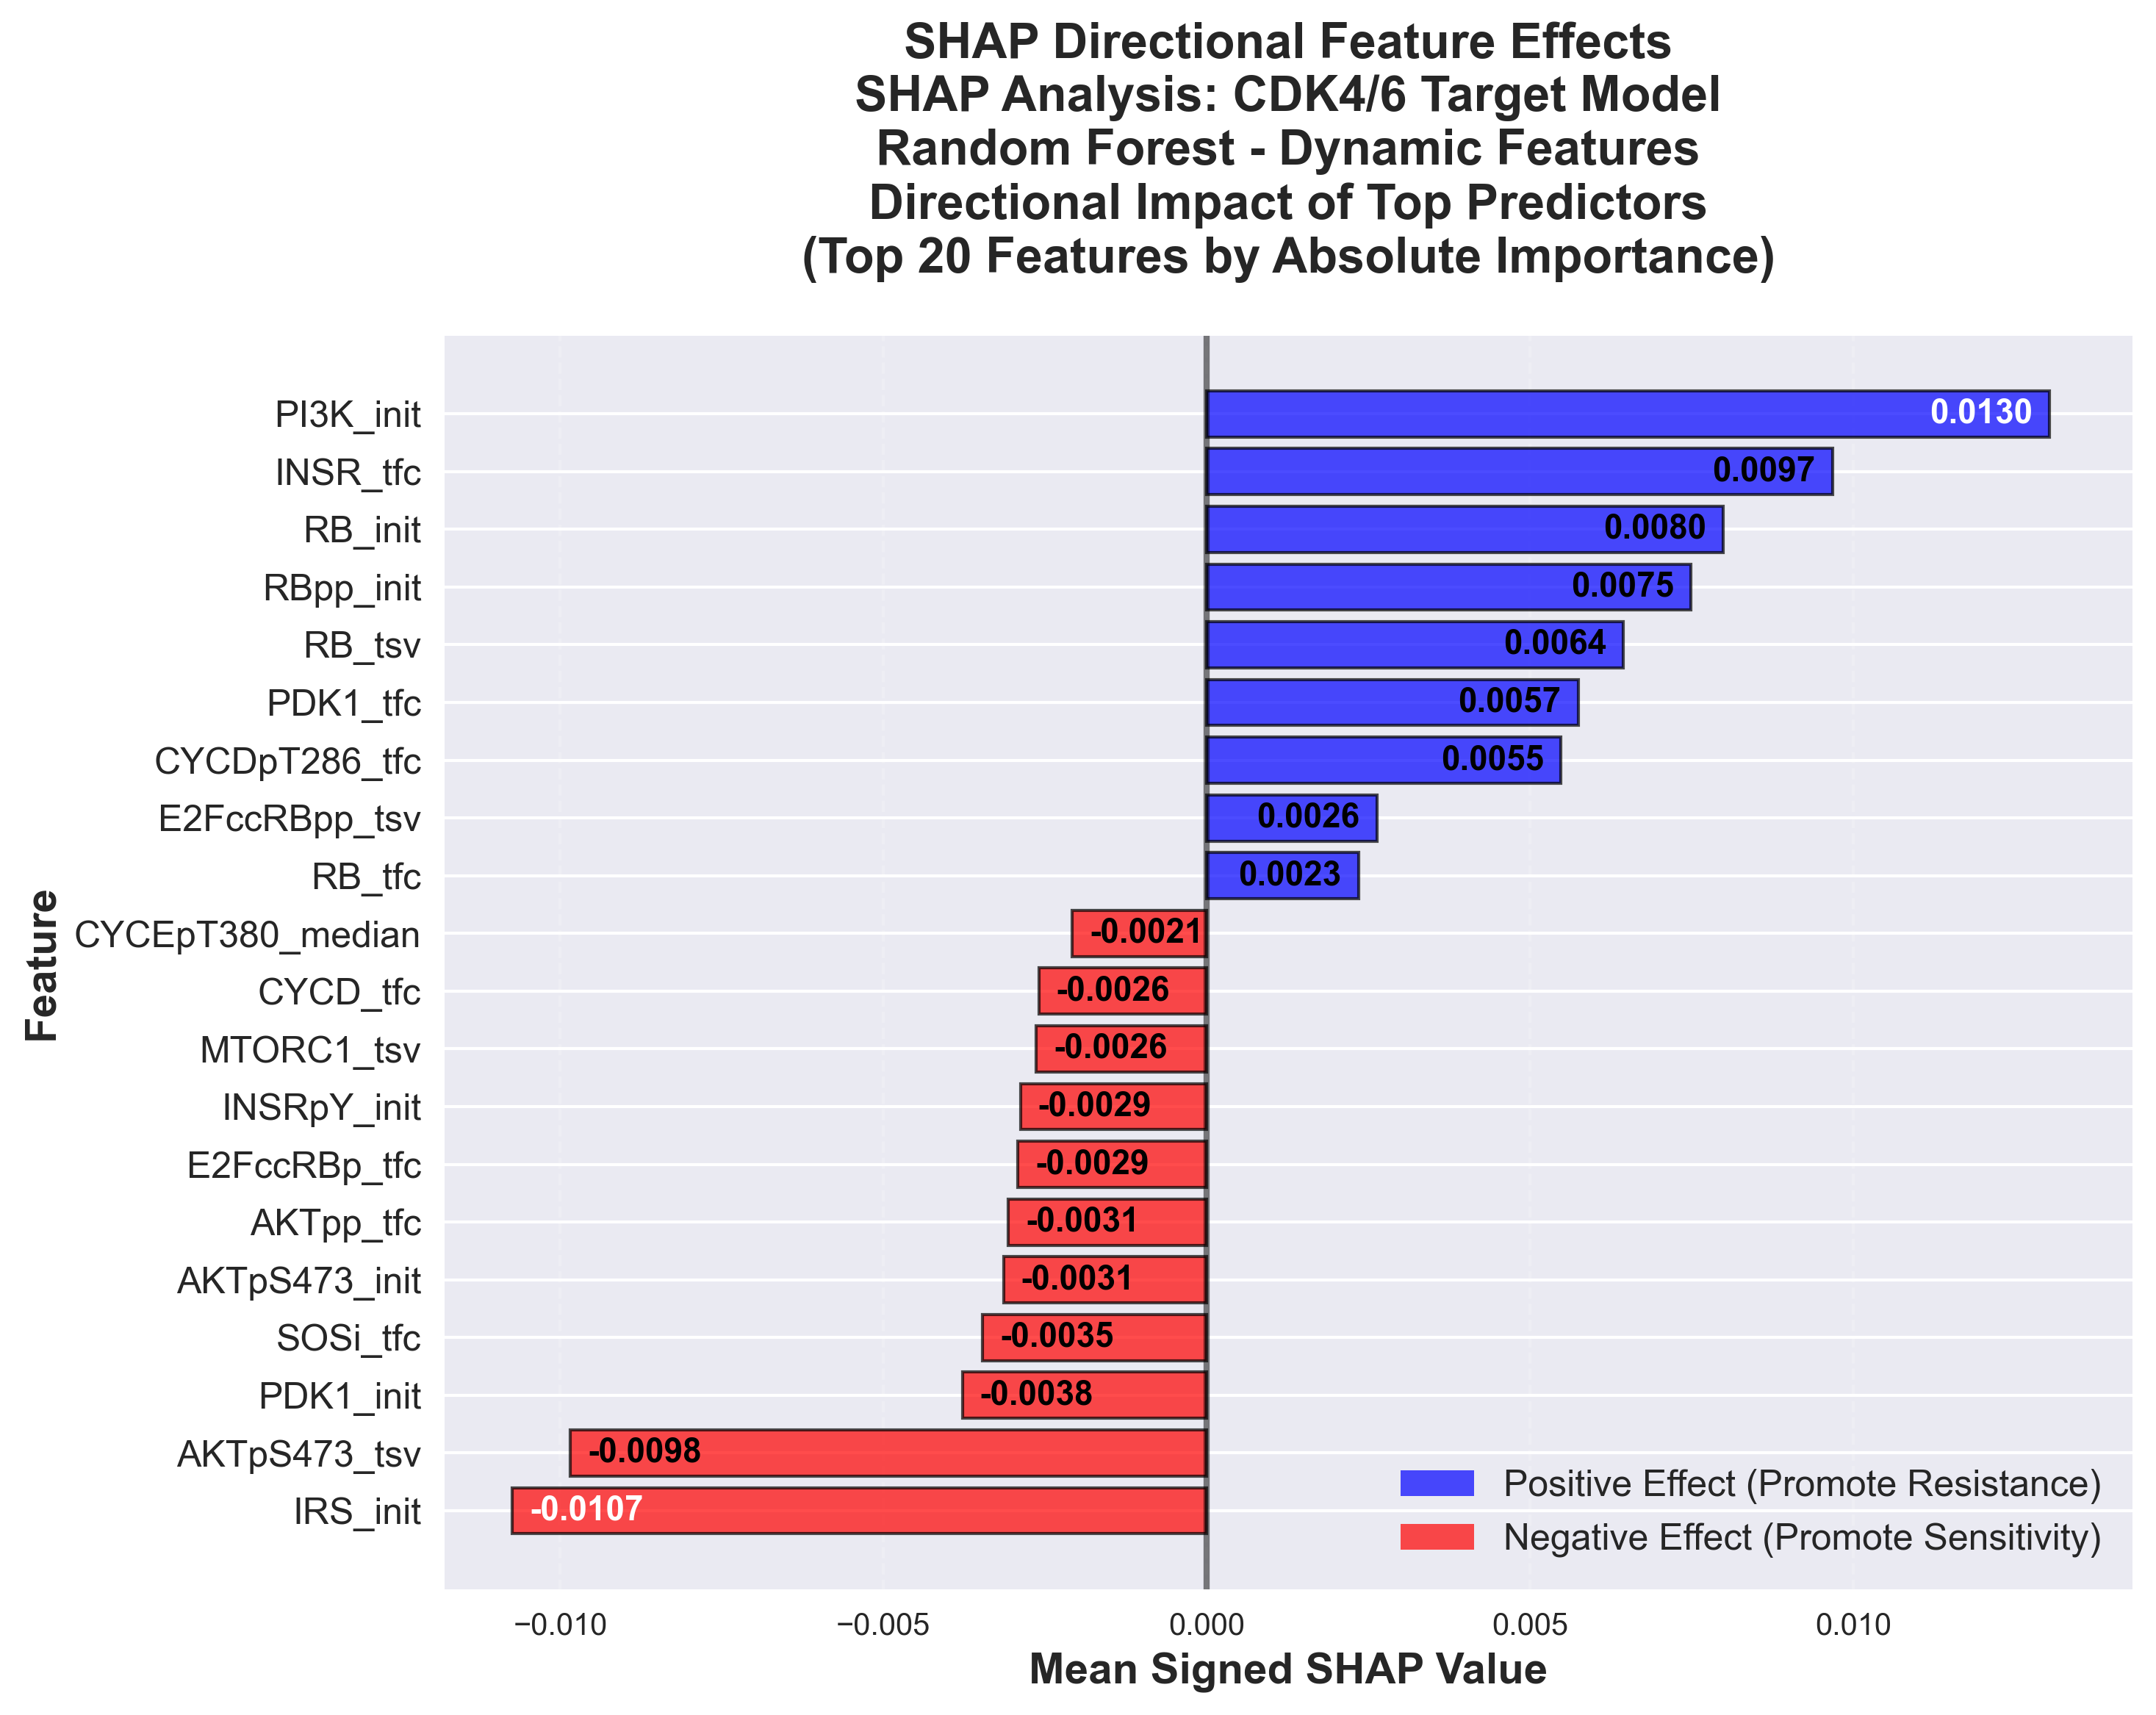

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                     mean_importance_signed  std_importance_signed  occurrence_count
condition                                             feature_name                                                                  
RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic PI3K_init                    0.013040               0.038211                20
                                                      INSR_tfc                     0.009680                    NaN                 1
               

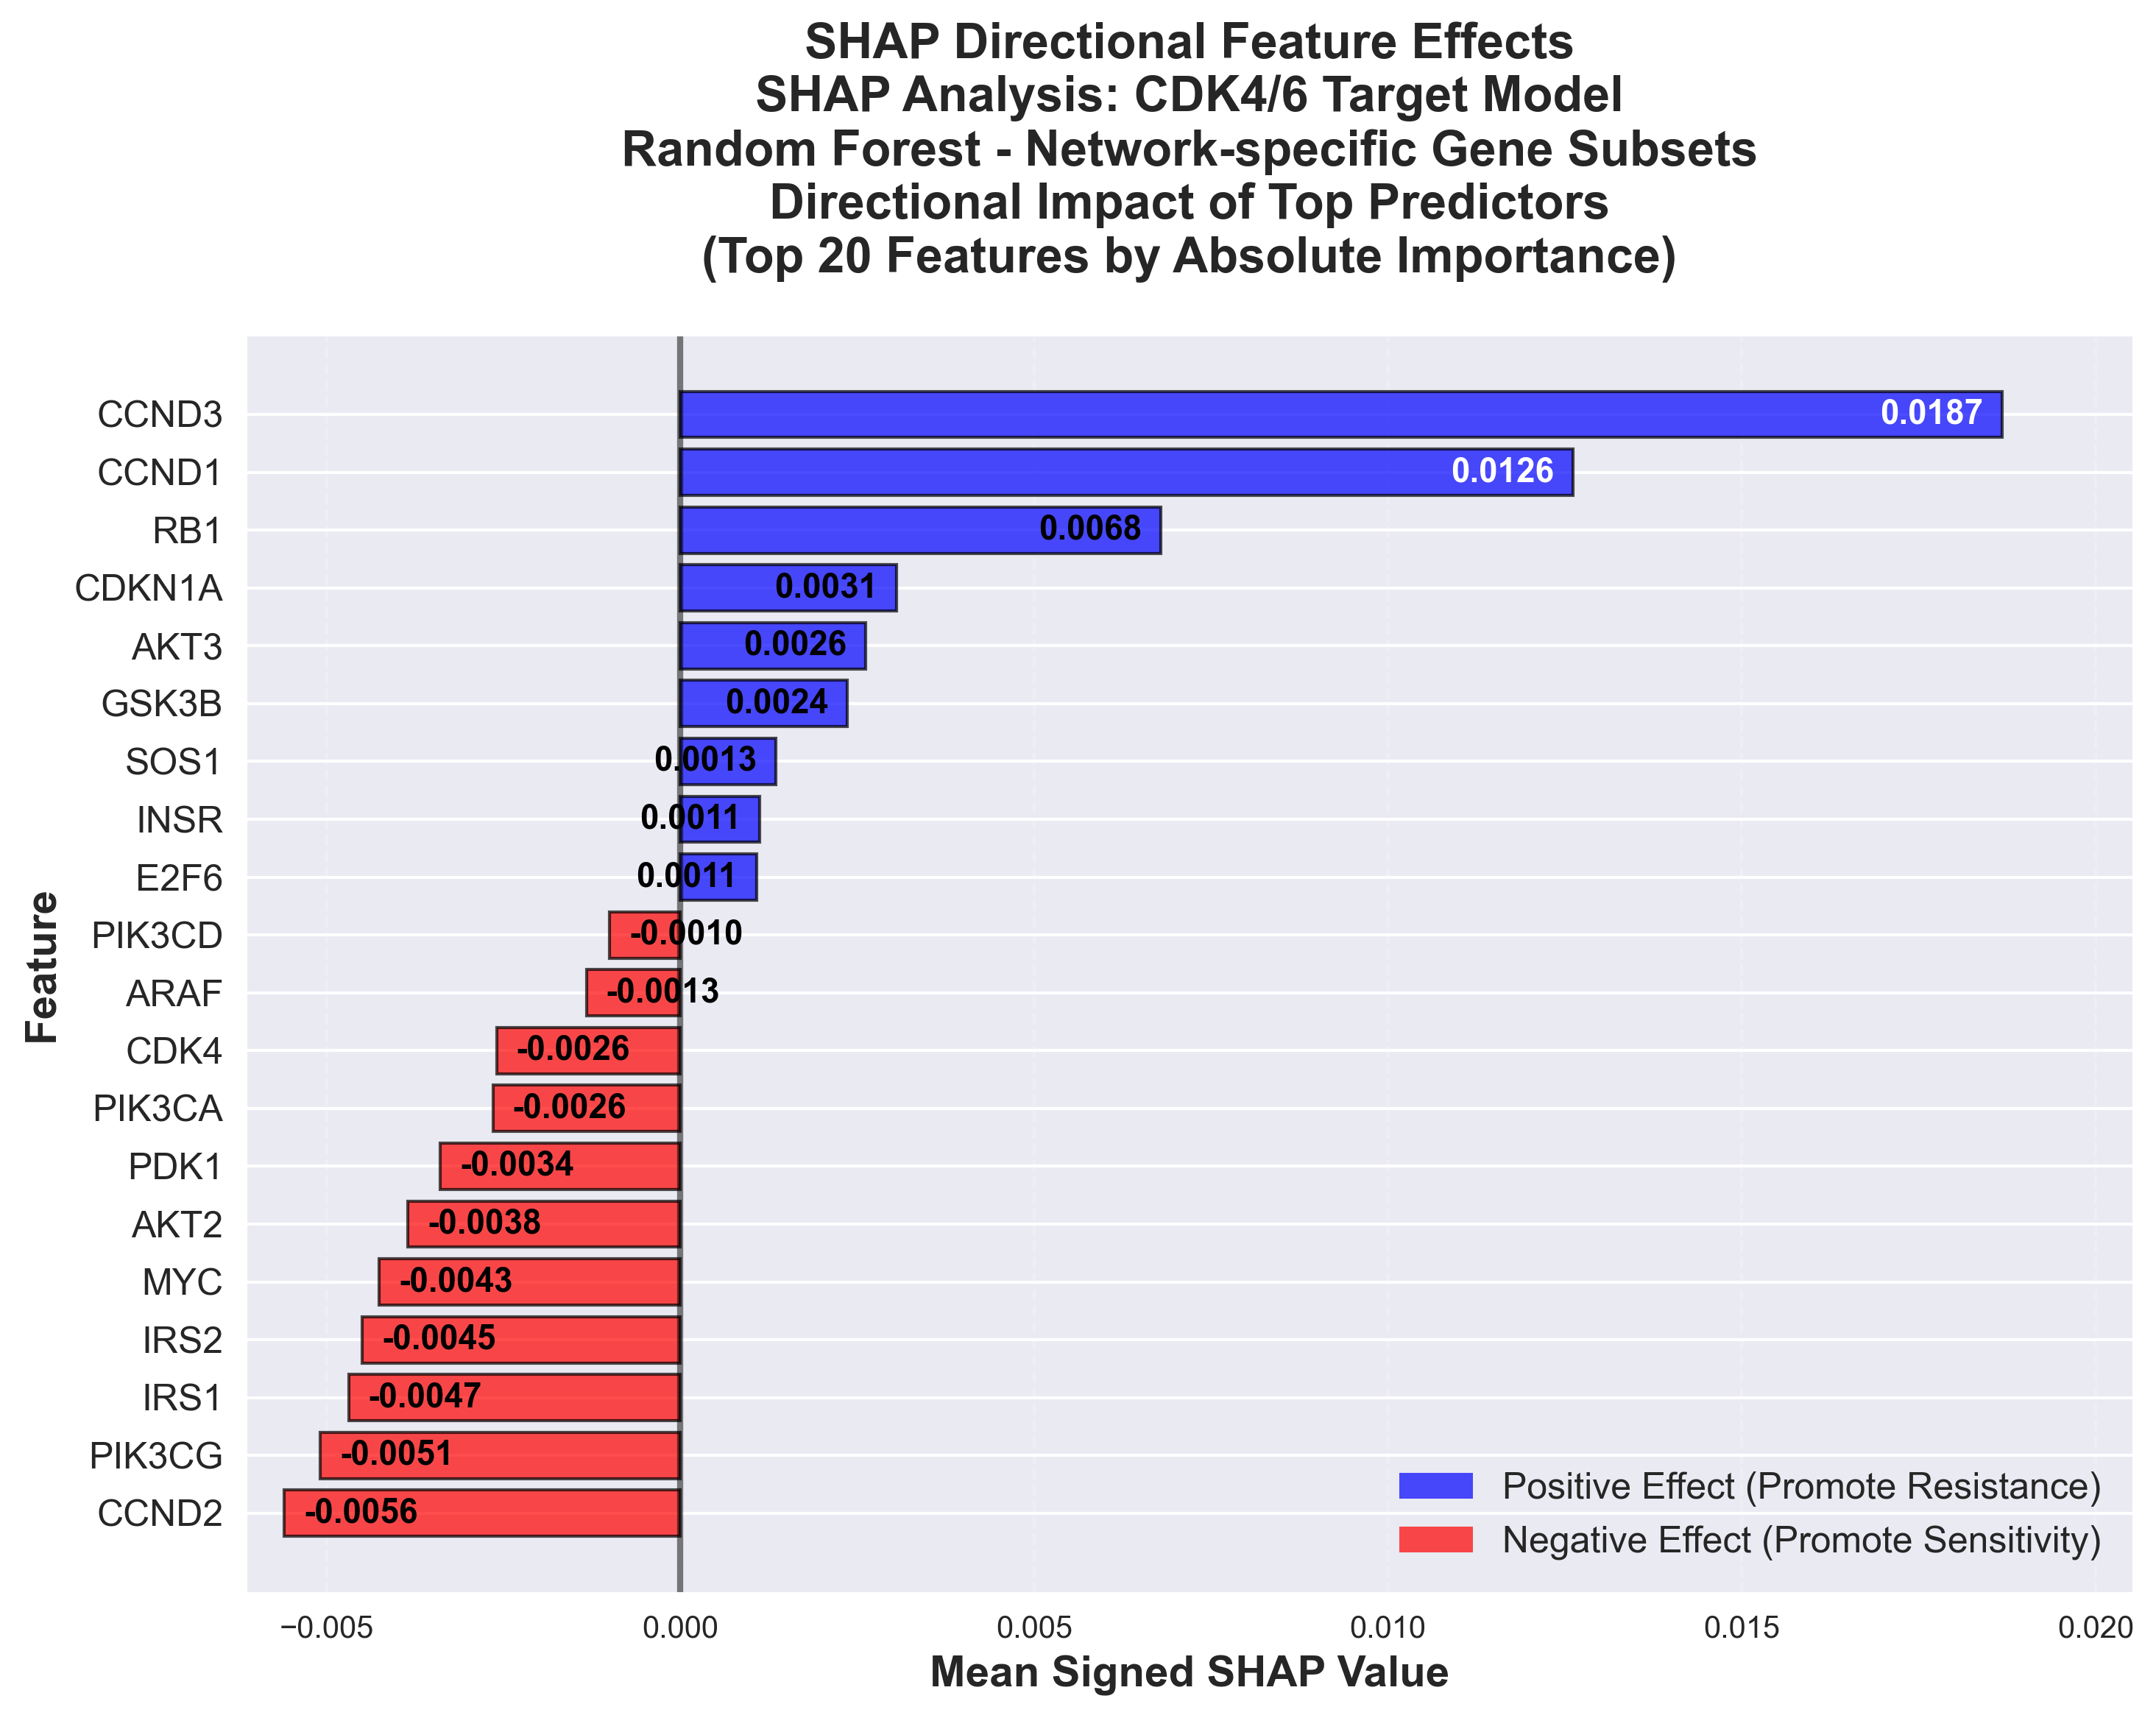

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                       mean_importance_signed  std_importance_signed  occurrence_count
condition                                                feature_name                                                                 
RandomForestRegressor_config1_k500_mrmr_cdk46_genesubset CCND3                       0.018674               0.010826                20
                                                         CCND1                       0.012610               0.021686                20
 

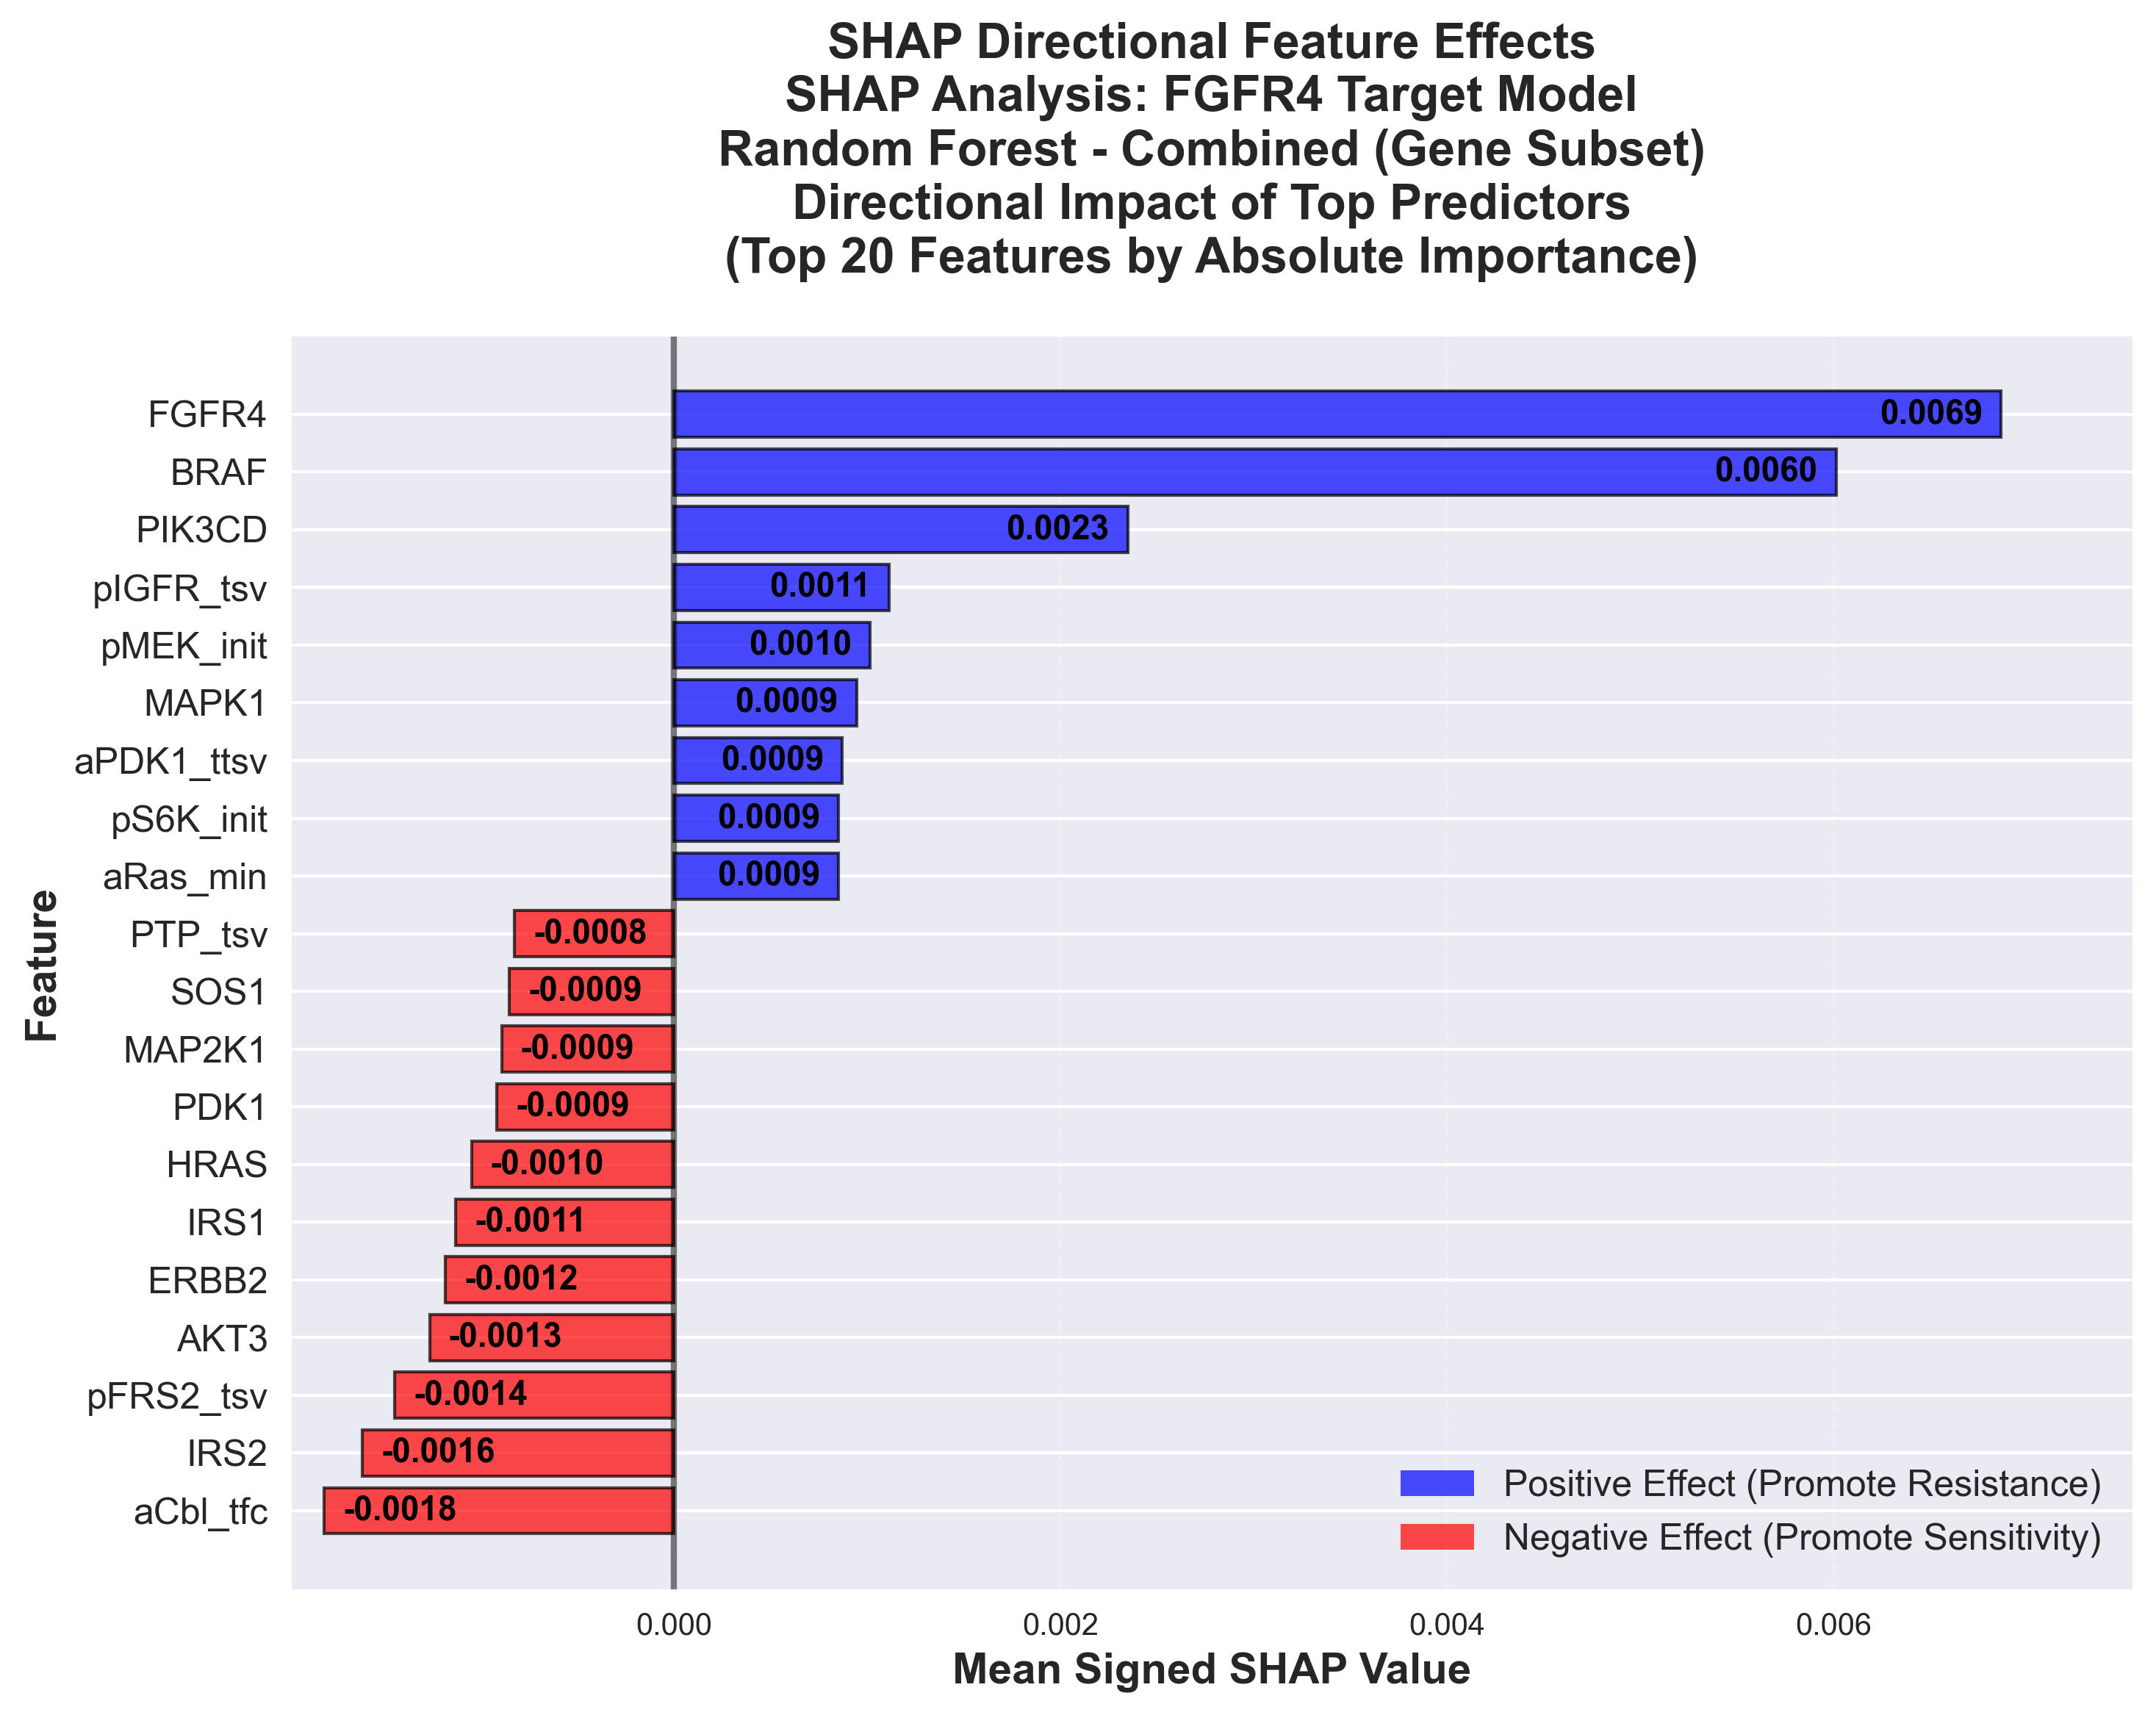

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_fgfr4_combined
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_fgfr4_combined_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                     mean_importance_signed  std_importance_signed  occurrence_count
condition                                              feature_name                                                                 
RandomForestRegressor_config1_k500_mrmr_fgfr4_combined FGFR4                       0.006867               0.024221                20
                                                       BRAF                        0.006013               0.011653                20
             

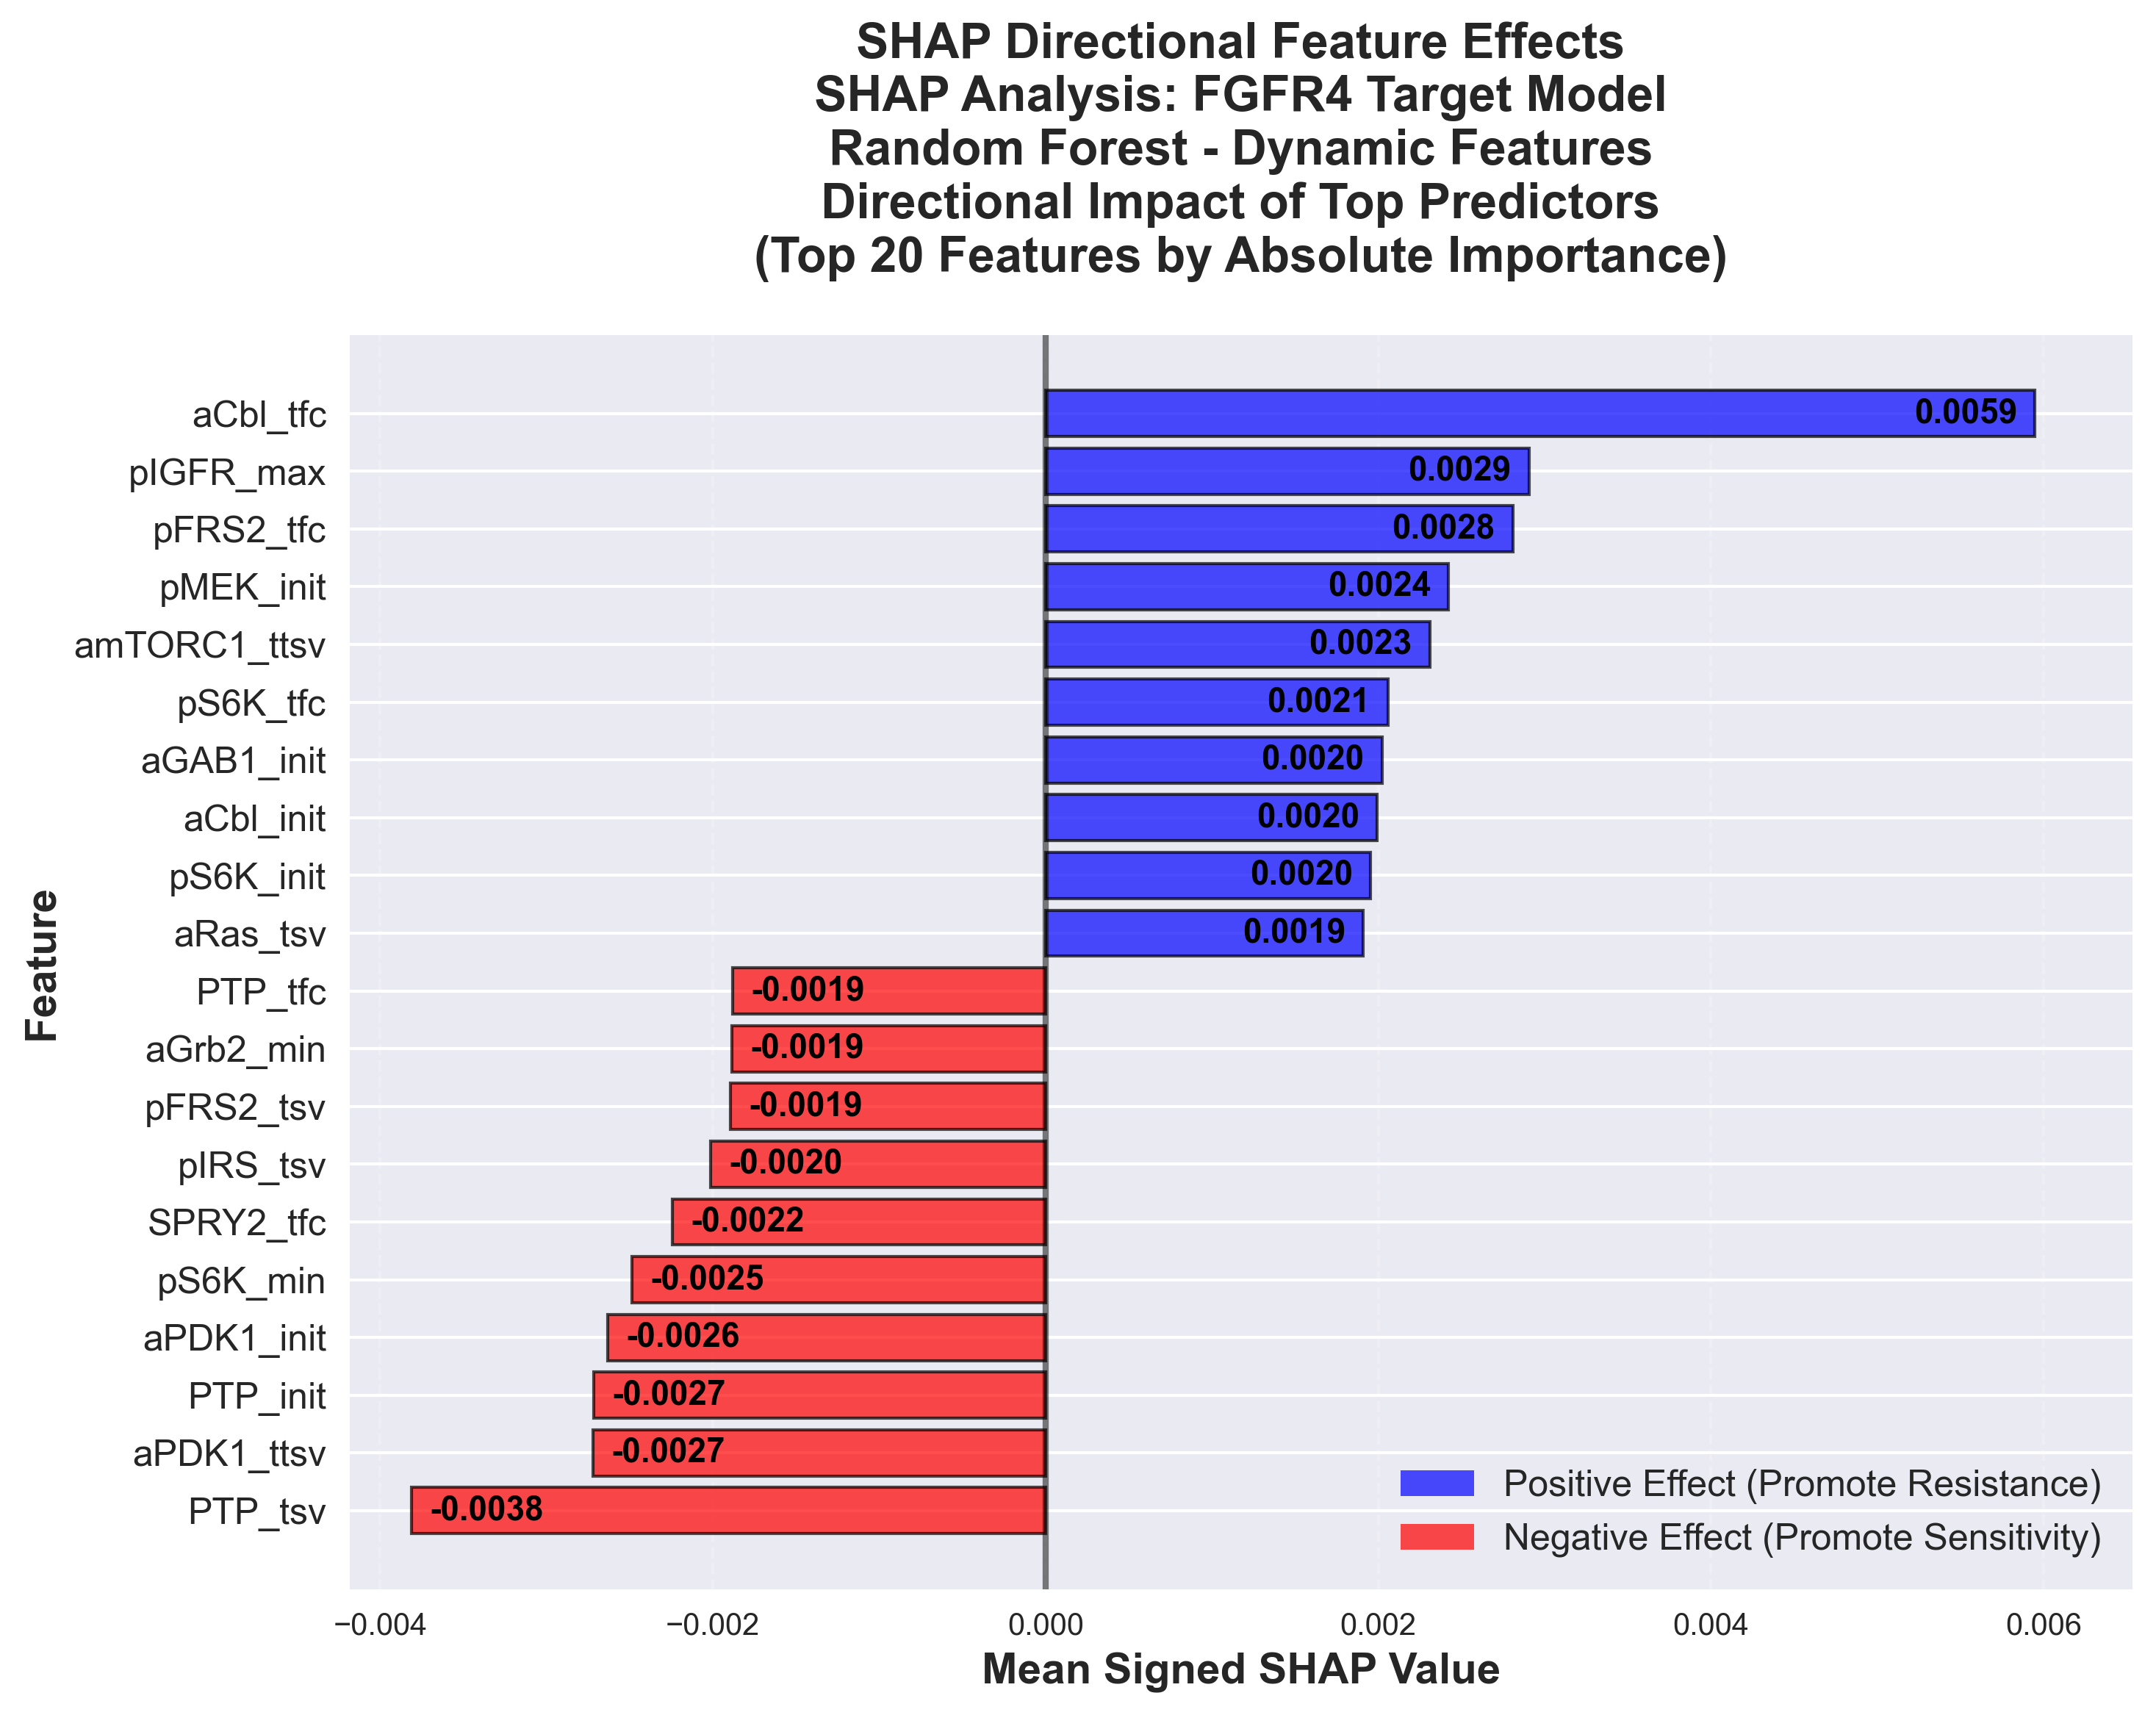

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_fgfr4_dynamic
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_fgfr4_dynamic_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                    mean_importance_signed  std_importance_signed  occurrence_count
condition                                             feature_name                                                                 
RandomForestRegressor_config1_k500_mrmr_fgfr4_dynamic aCbl_tfc                    0.005948               0.010896                20
                                                      pIGFR_max                   0.002906               0.005616                20
                   

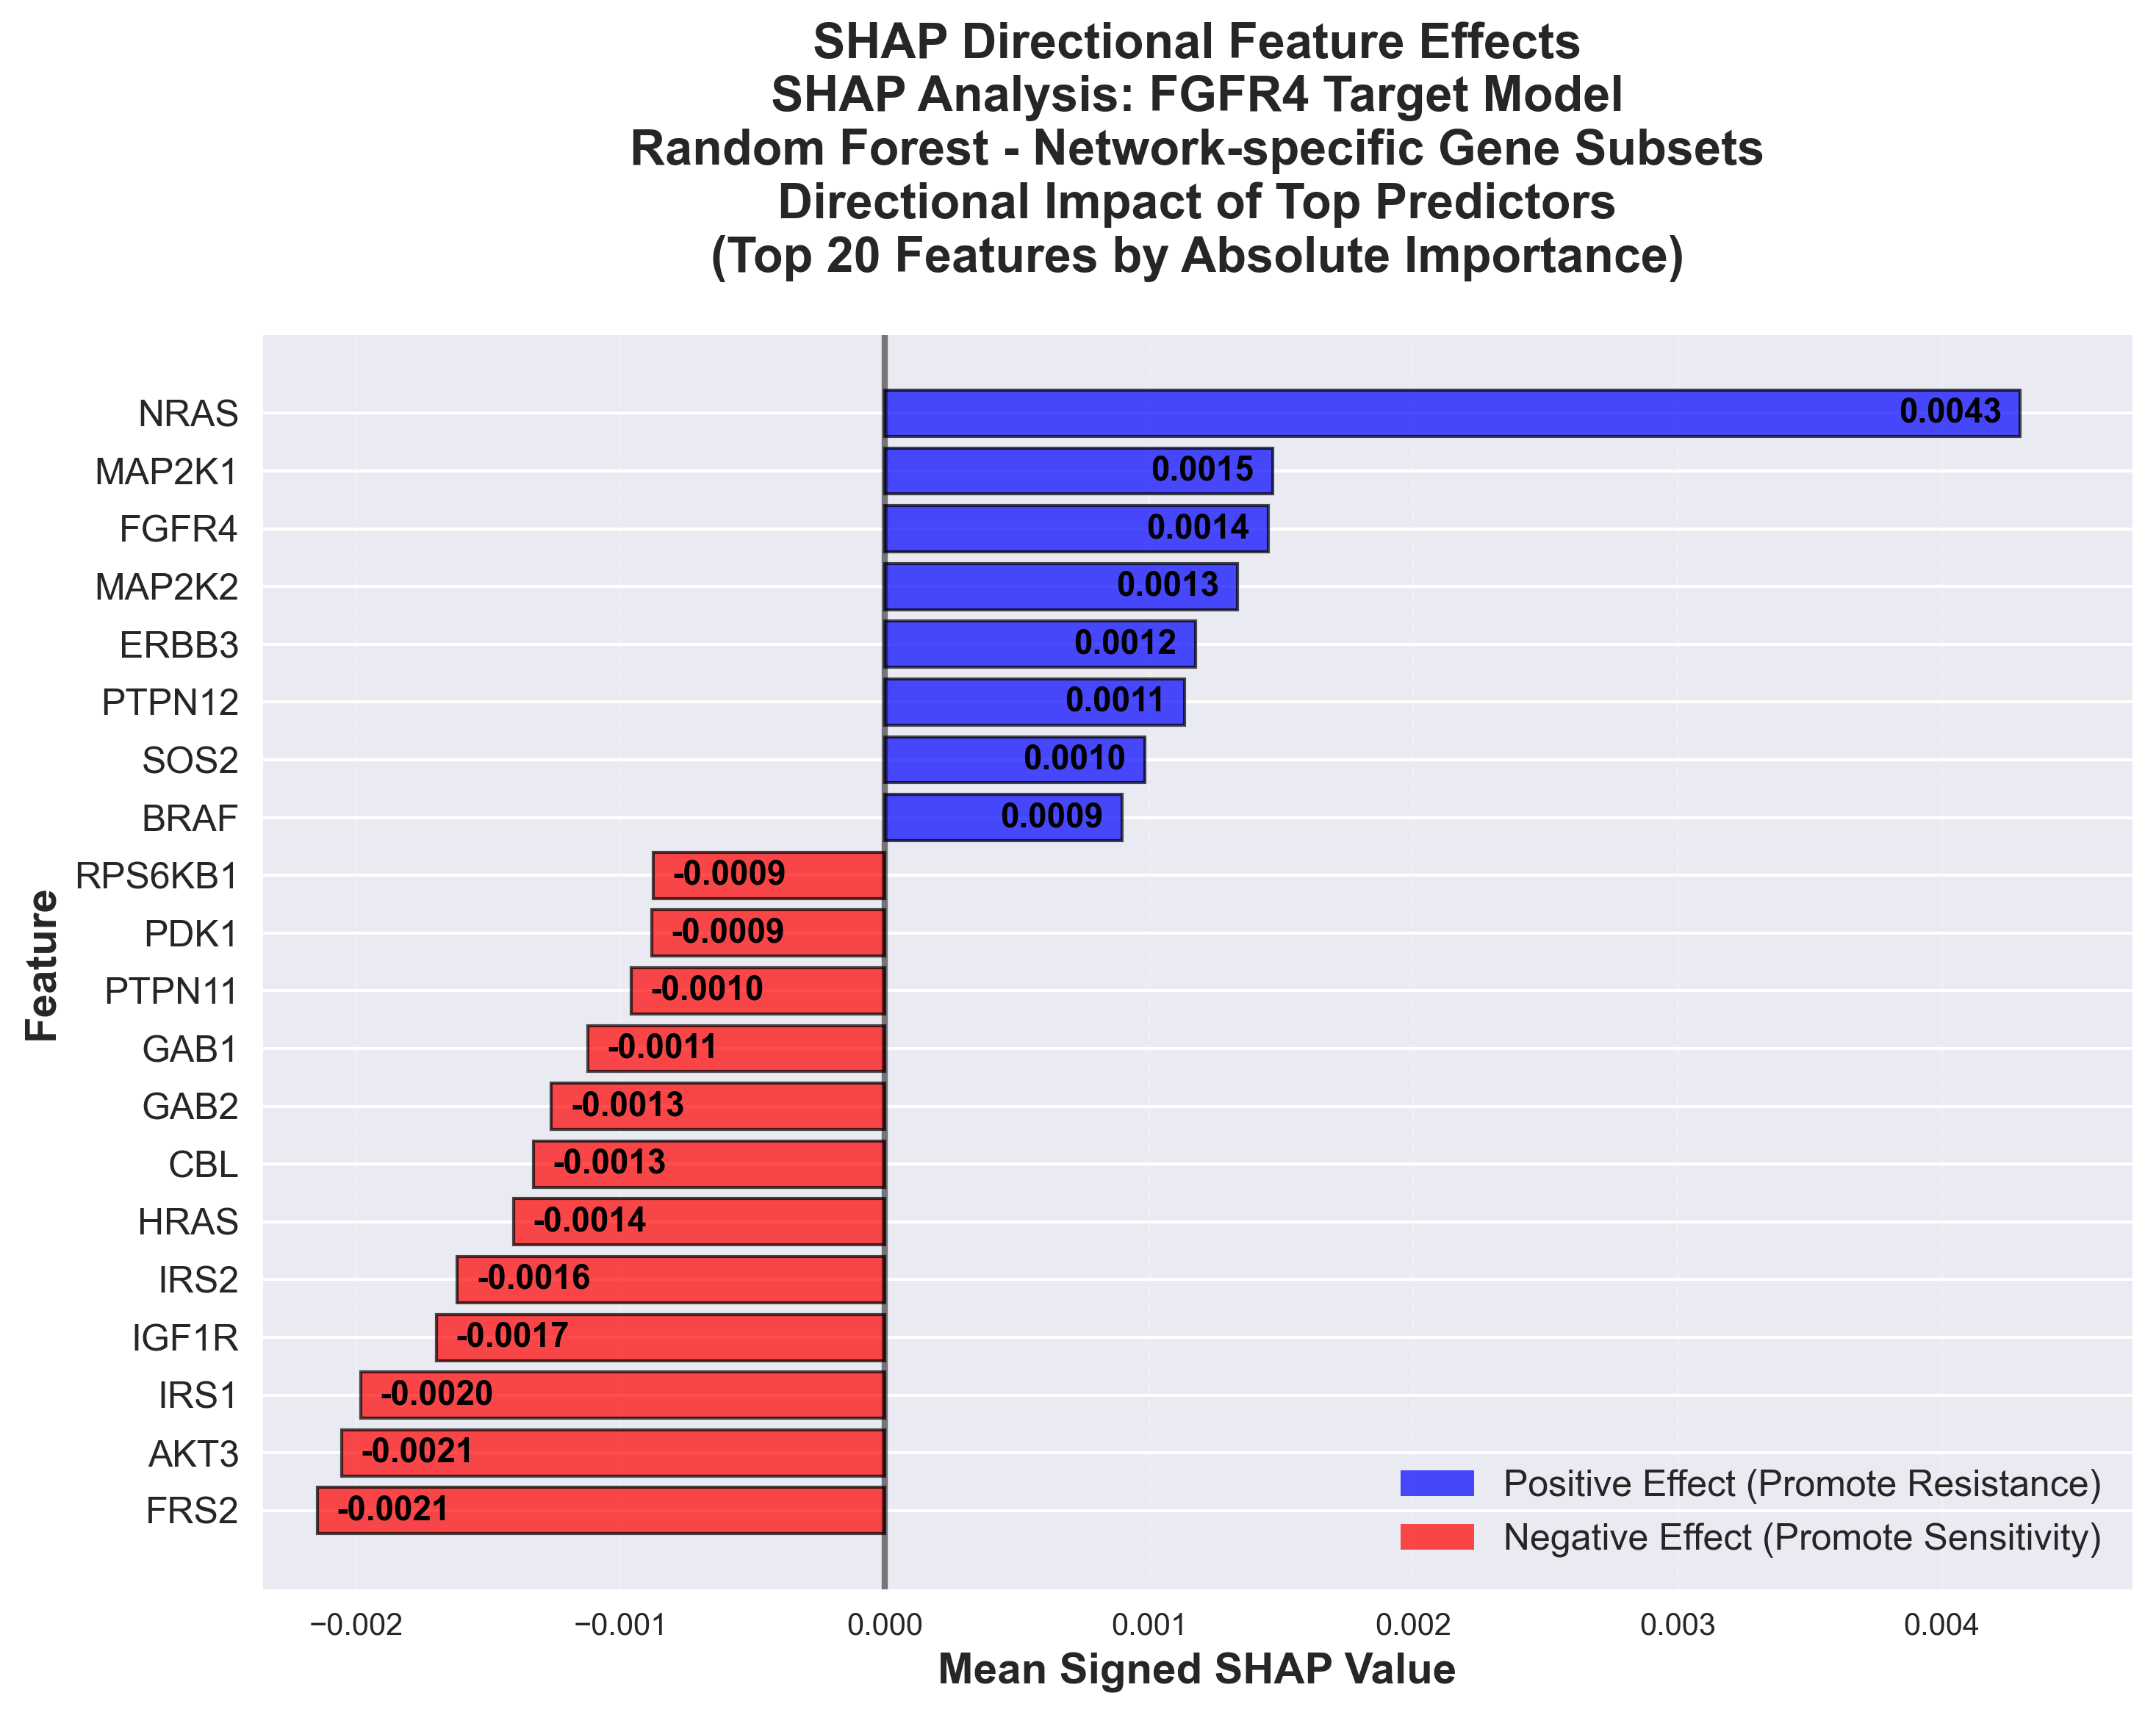

✓ Created bidirectional bar chart for RandomForestRegressor_config1_k500_mrmr_fgfr4_genesubset
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_bidirectional_RandomForestRegressor_config1_k500_mrmr_fgfr4_genesubset_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
### Top Features Summary
Top 10 positive impact features:
                                                                       mean_importance_signed  std_importance_signed  occurrence_count
condition                                                feature_name                                                                 
RandomForestRegressor_config1_k500_mrmr_fgfr4_genesubset NRAS                        0.004297               0.007746                20
                                                         MAP2K1                      0.001468               0.004944                20
 

In [9]:
def parse_condition_title(condition):
    """
    Parse technical condition string and generate natural language title.
    
    Args:
        condition: String like "RandomForestRegressor_config1_k500_mrmr_cdk46_dynamic"
    
    Returns:
        Natural language title for the visualization
    """
    parts = condition.split('_')
    
    # Map components to natural language
    model_mapping = {
        'RandomForestRegressor': 'Random Forest',
        'MLPRegressor': 'Multi-layer Perceptron',
        'KNeighborsRegressor': 'K-Neighbors'
    }
    
    network_mapping = {
        'cdk46': 'CDK4/6',
        'fgfr4': 'FGFR4'
    }
    
    dataset_mapping = {
        'dynamic': 'Dynamic Features',
        'genesubset': 'Network-specific Gene Subsets', 
        'combined': 'Combined (Gene Subset)'
    }
    
    # Extract components (handle variable length parts)
    model = parts[0] if len(parts) > 0 else 'Unknown'
    network = parts[-2] if len(parts) > 1 else 'Unknown'
    dataset_type = parts[-1] if len(parts) > 0 else 'Unknown'
    
    # Apply natural language mapping
    model_name = model_mapping.get(model, model)
    network_name = network_mapping.get(network, network)
    dataset_name = dataset_mapping.get(dataset_type, dataset_type)
    
    # Generate natural title
    return f"SHAP Analysis: {network_name} Target Model\n{model_name} - {dataset_name}\nDirectional Impact of Top Predictors"

save_and_print("## SHAP Bidirectional Bar Charts: Positive vs Negative Impact", print_report_file, level="section")

# Check if we have signed SHAP data
if 'shap_consensus_importance_signed' in datasets:
    signed_consensus = datasets['shap_consensus_importance_signed']
    
    save_and_print("### Signed SHAP Data Analysis", print_report_file, level="subsection")
    
    # Analyze the structure of signed data
    if isinstance(signed_consensus, pd.DataFrame):
        # Extract conditions from multiindex
        conditions = signed_consensus.index.get_level_values(0).unique()
        
        save_and_print(f"Available conditions in signed SHAP data: {list(conditions)}", print_report_file, level="info")
        
        # Create bidirectional bar charts for each condition
        for condition in conditions:
            save_and_print(f"### Analysis for condition: {condition}", print_report_file, level="subsection")
            
            # Extract data for this condition
            condition_data = signed_consensus.xs(condition, level=0, drop_level=False)
            
            if len(condition_data) == 0:
                save_and_print(f"No data found for condition: {condition}", print_report_file, level="info")
                continue
            
            # Analyze directional effects
            if 'mean_importance_signed' in condition_data.columns:
                positive_effects = condition_data[condition_data['mean_importance_signed'] > 0]
                negative_effects = condition_data[condition_data['mean_importance_signed'] < 0]
                neutral_effects = condition_data[condition_data['mean_importance_signed'] == 0]
                
                save_and_print(f"Directional effects:", print_report_file, level="info")
                save_and_print(f"  - Positive effects: {len(positive_effects)} features", print_report_file, level="info")
                save_and_print(f"  - Negative effects: {len(negative_effects)} features", print_report_file, level="info")
                save_and_print(f"  - Neutral effects: {len(neutral_effects)} features", print_report_file, level="info")
                
                # Create bidirectional bar chart
                try:
                    # Set up publication-quality styling
                    plt.style.use('seaborn-v0_8')
                    plt.rcParams['font.family'] = 'sans-serif'
                    plt.rcParams['font.size'] = 14
                    plt.rcParams['axes.linewidth'] = 1.2
                    
                    # Take top 20 features by absolute signed importance (both positive and negative)
                    condition_data_copy = condition_data.copy()
                    condition_data_copy['abs_importance'] = condition_data_copy['mean_importance_signed'].abs()
                    
                    # Get top 20 features by absolute importance
                    top_features = condition_data_copy.nlargest(20, 'abs_importance')
                    
                    # Sort by signed value for better visualization (negative to positive)
                    top_features = top_features.sort_values('mean_importance_signed', ascending=True)
                    
                    # Create horizontal bar plot with color coding for direction
                    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
                    
                    # Create color mapping based on sign
                    colors = ['red' if x < 0 else 'blue' for x in top_features['mean_importance_signed']]
                    
                    # Create the bar plot
                    bars = ax.barh(range(len(top_features)), top_features['mean_importance_signed'], 
                                  color=colors, alpha=0.7, edgecolor='black', linewidth=1)
                    
                    # Set y-axis labels to feature names
                    y_positions = range(len(top_features))
                    feature_names = [str(feature) for feature in top_features.index.get_level_values(1)]
                    ax.set_yticks(y_positions)
                    ax.set_yticklabels(feature_names, fontsize=12)
                    
                    # Label axes
                    ax.set_xlabel('Mean Signed SHAP Value', fontsize=14, fontweight='bold')
                    ax.set_ylabel('Feature', fontsize=14, fontweight='bold')
                    # Generate natural title from condition
                    natural_title = parse_condition_title(condition)
                    ax.set_title(f'SHAP Directional Feature Effects\n{natural_title}\n(Top 20 Features by Absolute Importance)', 
                                fontsize=16, fontweight='bold', pad=20)
                    
                    # Set x-axis limits to accommodate both positive and negative values
                    x_min = top_features['mean_importance_signed'].min() * 1.1
                    x_max = top_features['mean_importance_signed'].max() * 1.1
                    ax.set_xlim(x_min, x_max)
                    
                    # Add vertical line at zero for reference
                    ax.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=2)
                    
                    # Add value labels inside bars
                    for i, (v, feature_name) in enumerate(zip(top_features['mean_importance_signed'], feature_names)):
                        if v < 0:
                            # For negative values, place label to the right of the bar
                            ax.text(v + (x_max - x_min) * 0.01, i, f'{v:.4f}', va='center', fontsize=11, 
                                    fontweight='bold', color='white' if abs(v) > 0.01 else 'black')
                        else:
                            # For positive values, place label to the left of the bar
                            ax.text(v - (x_max - x_min) * 0.01, i, f'{v:.4f}', va='center', fontsize=11, 
                                    fontweight='bold', color='white' if abs(v) > 0.01 else 'black', ha='right')
                    
                    # Create custom legend
                    from matplotlib.patches import Patch
                    legend_elements = [
                        Patch(facecolor='blue', alpha=0.7, label='Positive Effect (Promote Resistance)'),
                        Patch(facecolor='red', alpha=0.7, label='Negative Effect (Promote Sensitivity)')
                    ]
                    ax.legend(handles=legend_elements, loc='lower right', fontsize=12, framealpha=0.9)
                    
                    # Add grid for readability
                    ax.grid(axis='x', alpha=0.2, linestyle='--')
                    
                    plt.tight_layout()
                    
                    # Save the plot
                    condition_clean = condition.replace(' ', '_').replace('/', '_')
                    plot_filename = f"{file_save_path}shap_bidirectional_{condition_clean}_{exp_id}.png"
                    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
                    plt.show()
                    
                    save_and_print(f"✓ Created bidirectional bar chart for {condition}", print_report_file, level="info")
                    save_and_print(f"  Plot saved to: {plot_filename}", print_report_file, level="info")
                    
                    # Show top features summary
                    save_and_print("### Top Features Summary", print_report_file, level="subsection")
                    save_and_print("Top 10 positive impact features:", print_report_file, level="info")
                    top_positive = positive_effects.nlargest(10, 'mean_importance_signed')[['mean_importance_signed', 'std_importance_signed', 'occurrence_count']]
                    save_and_print(top_positive.to_string(), print_report_file, level="info")
                    
                    save_and_print("Top 10 negative impact features:", print_report_file, level="info")
                    top_negative = negative_effects.nsmallest(10, 'mean_importance_signed')[['mean_importance_signed', 'std_importance_signed', 'occurrence_count']]
                    save_and_print(top_negative.to_string(), print_report_file, level="info")
                    
                except Exception as e:
                    save_and_print(f"❌ Error creating bidirectional plot for {condition}: {str(e)}", print_report_file, level="info")
            else:
                save_and_print("No 'mean_importance_signed' column found in signed consensus data", print_report_file, level="info")
    else:
        save_and_print("Signed SHAP consensus data is not in expected DataFrame format", print_report_file, level="info")
else:
    save_and_print("No signed SHAP consensus data available for bidirectional analysis", print_report_file, level="info")

## Section 4: Cross-Dataset Feature Importance Pattern Comparison

In [10]:
save_and_print("## Cross-Dataset Feature Importance Pattern Comparison", print_report_file, level="section")

def compare_feature_patterns_across_datasets(signed_consensus_data):
    """
    Compare feature importance patterns across different dataset types and networks.
    Focus on identifying dataset-specific signature features and common biomarkers.
    """
    save_and_print("### Cross-Dataset Pattern Comparison", print_report_file, level="subsection")
    
    if not isinstance(signed_consensus_data, pd.DataFrame):
        save_and_print("Invalid data format for pattern comparison", print_report_file, level="info")
        return
    
    # Extract all conditions and parse their components
    conditions = signed_consensus_data.index.get_level_values(0).unique()
    
    # Group by network and dataset type
    comparison_groups = {}
    for condition in conditions:
        parts = condition.split('_')
        if len(parts) >= 5:
            network = parts[-2]
            dataset_type = parts[-1]
            group_key = (network, dataset_type)
            
            if group_key not in comparison_groups:
                comparison_groups[group_key] = {
                    'network': network,
                    'dataset_type': dataset_type,
                    'conditions': []
                }
            comparison_groups[group_key]['conditions'].append(condition)
    
    # Calculate top features for each group
    group_top_features = {}
    for group_key, group_info in comparison_groups.items():
        network, dataset_type = group_key
        
        # Combine data from all conditions in this group
        group_data = []
        for condition in group_info['conditions']:
            condition_data = signed_consensus_data.xs(condition, level=0, drop_level=False)
            group_data.append(condition_data)
        
        if group_data:
            combined_group_data = pd.concat(group_data)
            
            # Calculate mean importance across conditions in this group
            group_importance = combined_group_data.groupby(level=1)['mean_importance_signed'].mean()
            group_importance = group_importance.sort_values(key=abs, ascending=False)
            
            # Get top 10 features (positive and negative combined)
            top_10 = group_importance.head(10)
            
            group_top_features[group_key] = {
                'top_features': top_10,
                'network': network,
                'dataset_type': dataset_type
            }
            
            save_and_print(f"**{network.upper()} - {dataset_type.title()} Top Features:**", print_report_file, level="info")
            for i, (feature, importance) in enumerate(top_10.items(), 1):
                direction = "Positive" if importance > 0 else "Negative"
                save_and_print(f"{i}. {feature}: {importance:.4f} ({direction})", print_report_file, level="info")
    
    return group_top_features

# Perform cross-dataset comparison
if 'shap_consensus_importance_signed' in datasets:
    try:
        comparison_results = compare_feature_patterns_across_datasets(datasets['shap_consensus_importance_signed'])
        save_and_print("✓ Completed cross-dataset pattern comparison", print_report_file, level="info")
    except Exception as e:
        save_and_print(f"❌ Error in cross-dataset comparison: {str(e)}", print_report_file, level="info")
else:
    save_and_print("No data available for cross-dataset comparison", print_report_file, level="info")

## Cross-Dataset Feature Importance Pattern Comparison
### Cross-Dataset Pattern Comparison
**CDK46 - Combined Top Features:**
1. CCND3: 0.0129 (Positive)
2. CCND1: 0.0092 (Positive)
3. IRS_init: -0.0057 (Negative)
4. CCND2: -0.0054 (Negative)
5. RB_tsv: 0.0046 (Positive)
6. AKTpS473_tsv: -0.0040 (Negative)
7. PDK1_tfc: 0.0040 (Positive)
8. E2FccRBpp_tsv: 0.0030 (Positive)
9. RBpp_init: 0.0029 (Positive)
10. SOSi_tfc: -0.0027 (Negative)
**CDK46 - Dynamic Top Features:**
1. PI3K_init: 0.0130 (Positive)
2. IRS_init: -0.0107 (Negative)
3. AKTpS473_tsv: -0.0098 (Negative)
4. INSR_tfc: 0.0097 (Positive)
5. RB_init: 0.0080 (Positive)
6. RBpp_init: 0.0075 (Positive)
7. RB_tsv: 0.0064 (Positive)
8. PDK1_tfc: 0.0057 (Positive)
9. CYCDpT286_tfc: 0.0055 (Positive)
10. PDK1_init: -0.0038 (Negative)
**CDK46 - Genesubset Top Features:**
1. CCND3: 0.0187 (Positive)
2. CCND1: 0.0126 (Positive)
3. RB1: 0.0068 (Positive)
4. CCND2: -0.0056 (Negative)
5. PIK3CG: -0.0051 (Negative)
6. IRS1: -0.0047 (Negati

## Section 5: Major Plot 1 - Positive Effect Comparative Matrix Plot

## PLOT 1: Positive Effect Comparative Matrix Plot (2×3 Grid)
### Creating Positive Effect Matrix Plot


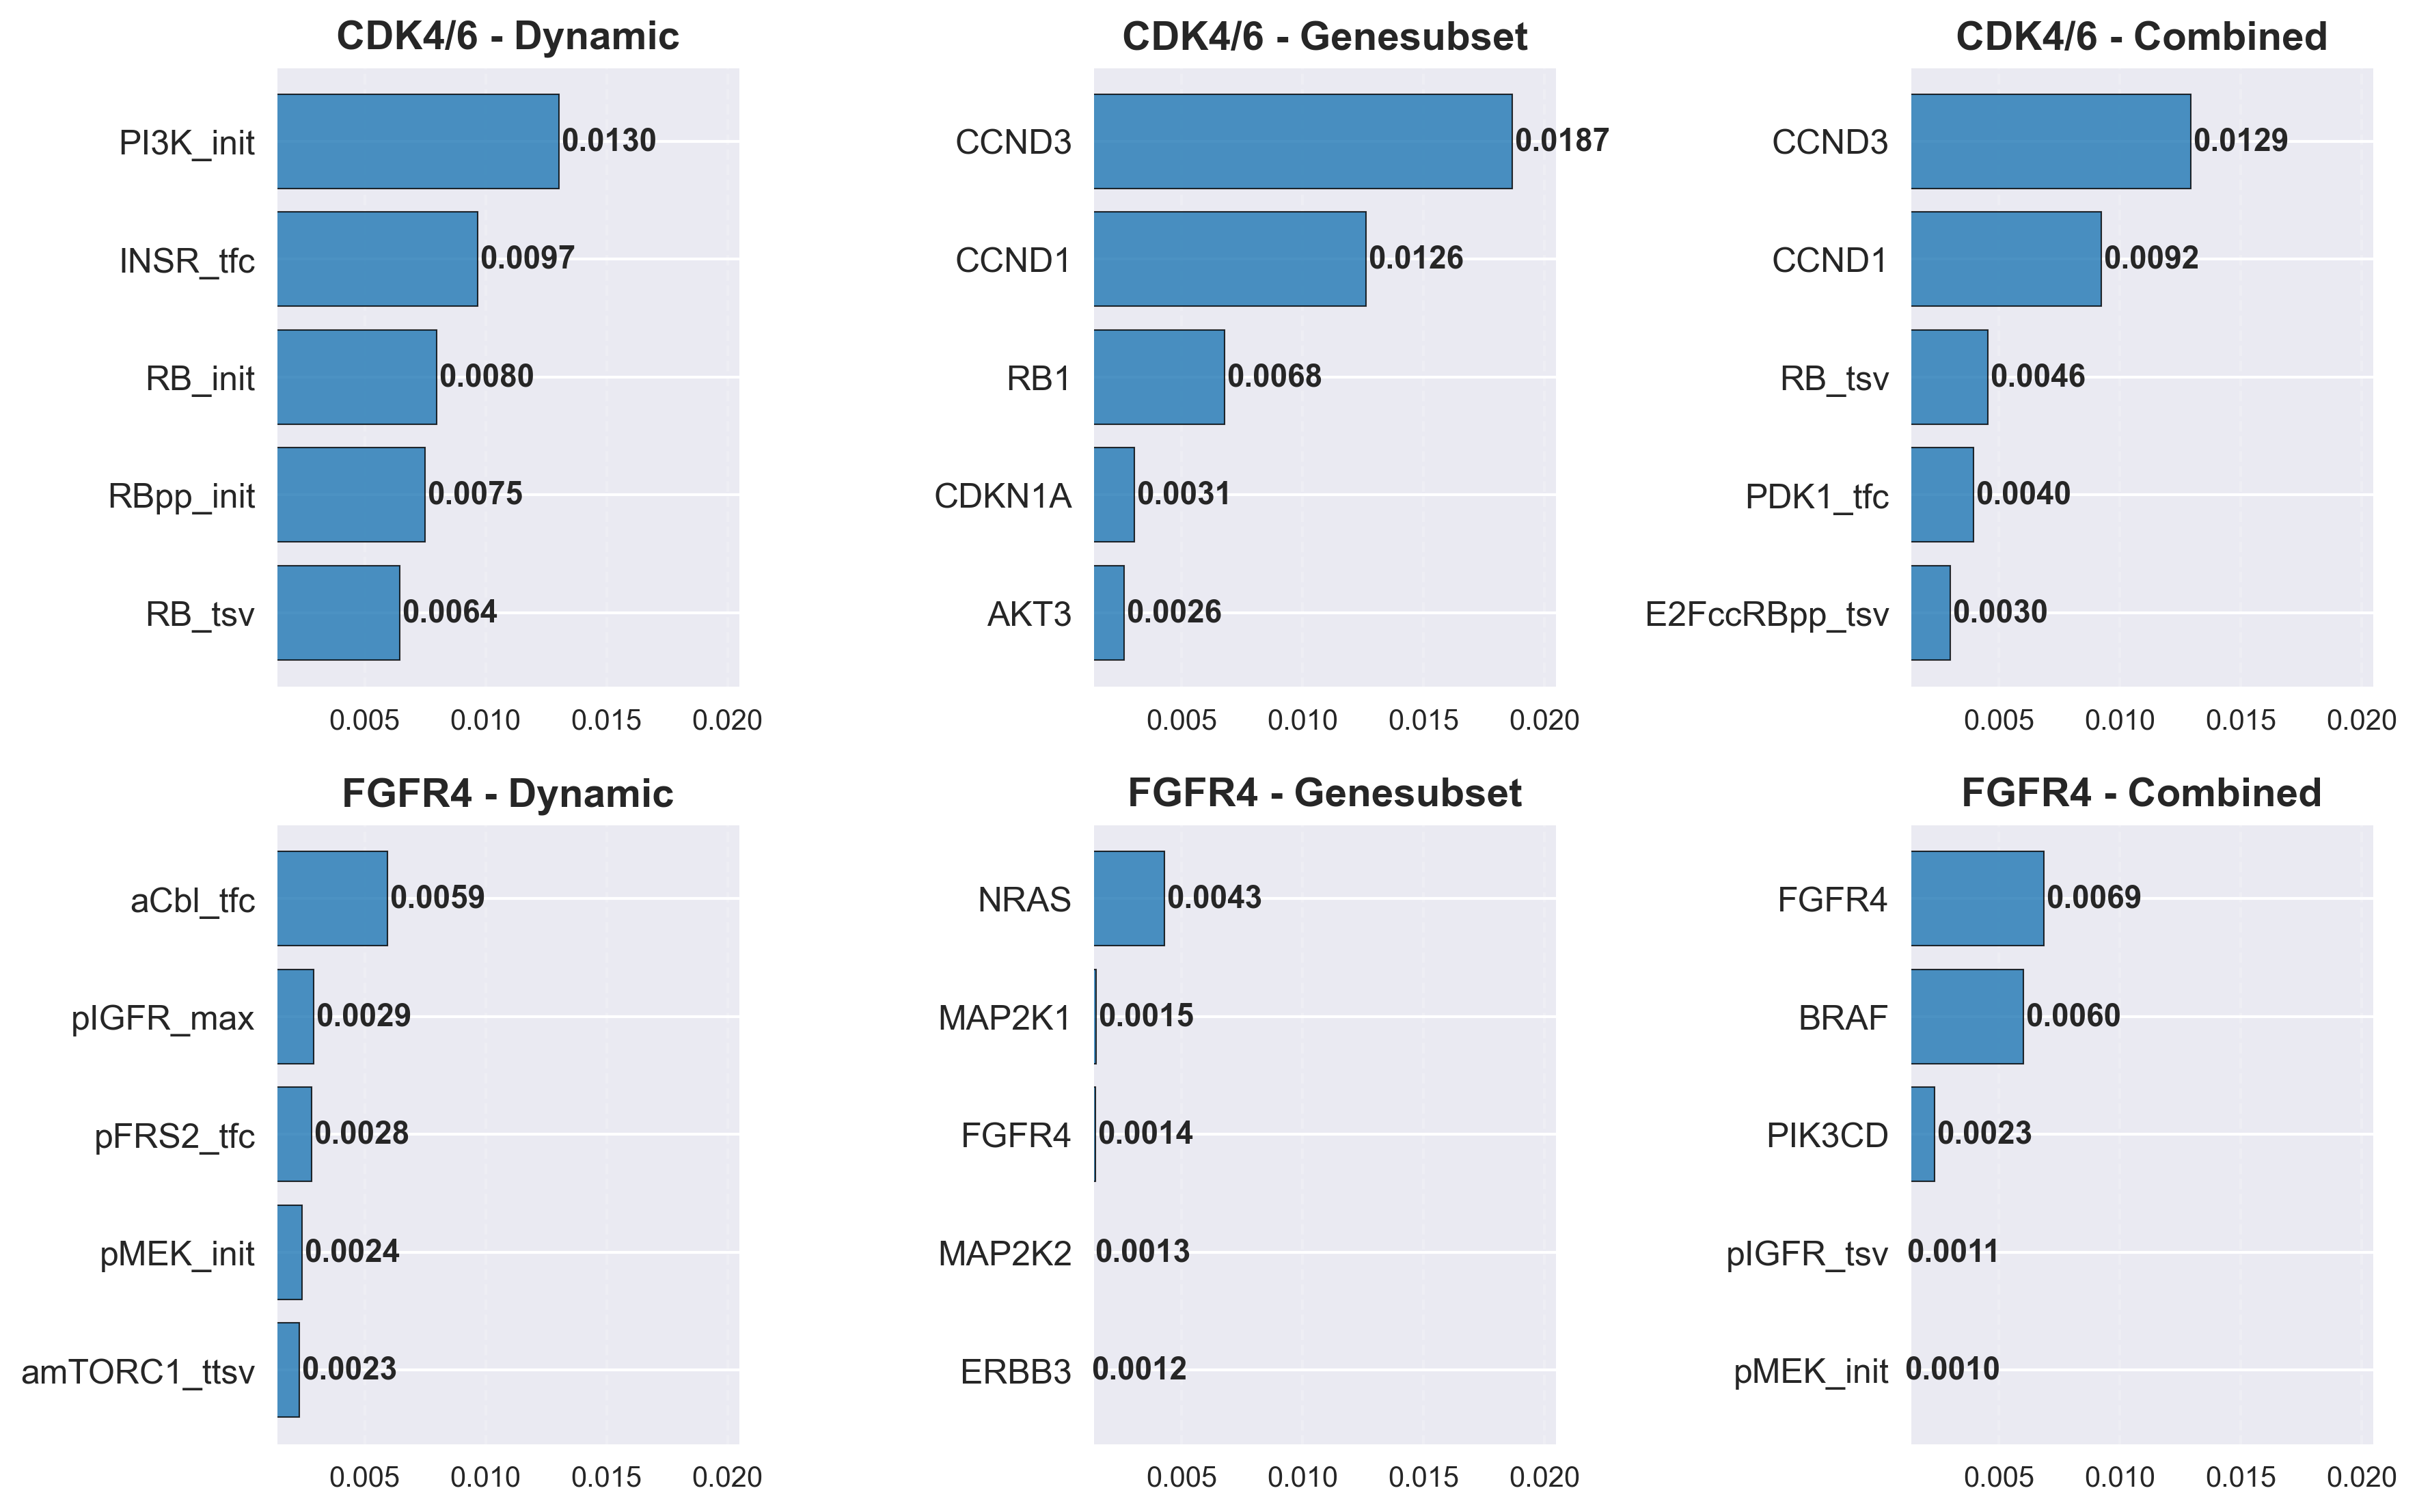

✓ Created positive effect matrix plot
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_positive_matrix_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
✓ Completed positive matrix plot creation


In [11]:
save_and_print("## PLOT 1: Positive Effect Comparative Matrix Plot (2×3 Grid)", print_report_file, level="section")

def create_positive_matrix_plot(signed_consensus_data, file_save_path, exp_id):
    """
    Create a 2×3 matrix plot showing top 5 positive-impact features across all experimental conditions.
    
    Args:
        signed_consensus_data: DataFrame with signed SHAP values
        file_save_path: Path to save the plot
        exp_id: Experiment identifier for filename
    """
    save_and_print("### Creating Positive Effect Matrix Plot", print_report_file, level="subsection")
    
    if not isinstance(signed_consensus_data, pd.DataFrame):
        save_and_print("Invalid data format for positive matrix plot", print_report_file, level="info")
        return
    
    # Extract all conditions
    conditions = signed_consensus_data.index.get_level_values(0).unique()
    
    # Define networks and dataset types for the 2×3 grid
    networks = ['cdk46', 'fgfr4']
    dataset_types = ['dynamic', 'genesubset', 'combined']
    
    # Set up publication-quality styling
    plt.style.use('seaborn-v0_8')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.linewidth'] = 1.2
    
    # Create 2×3 subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), dpi=300)
    # fig.suptitle('Positive Impact Feature Comparison Across Datasets\n(Top 5 Features per Condition)', 
    #              fontsize=16, fontweight='bold', y=0.95)
    
    # Color scheme
    positive_color = '#1f77b4'  # Royal Blue
    context_color = '#d3d3d3'   # Light Gray
    
    # Track global x-axis limits for consistent scaling
    global_x_min = float('inf')
    global_x_max = float('-inf')
    
    # Prepare data for each subplot
    subplot_data = {}
    
    for i, network in enumerate(networks):
        for j, dataset_type in enumerate(dataset_types):
            # Find matching condition
            matching_conditions = [cond for cond in conditions 
                                  if network in cond and dataset_type in cond]
            
            if matching_conditions:
                # Use the first matching condition
                condition = matching_conditions[0]
                condition_data = signed_consensus_data.xs(condition, level=0, drop_level=False)
                
                # Get top 5 positive features
                positive_effects = condition_data[condition_data['mean_importance_signed'] > 0]
                top_5_positive = positive_effects.nlargest(5, 'mean_importance_signed')
                
                if len(top_5_positive) > 0:
                    # Sort for visualization (highest positive first)
                    top_5_positive = top_5_positive.sort_values('mean_importance_signed', ascending=False)
                    
                    # Update global limits
                    current_max = top_5_positive['mean_importance_signed'].max()
                    global_x_max = max(global_x_max, current_max)
                    global_x_min = min(global_x_max * 0.1, global_x_min)  # Small positive buffer
                    
                    subplot_data[(i, j)] = {
                        'data': top_5_positive,
                        'condition': condition,
                        'network': network,
                        'dataset_type': dataset_type
                    }
    
    # Apply consistent scaling and create plots
    for (i, j), plot_info in subplot_data.items():
        ax = axes[i, j]
        data = plot_info['data']
        
        # Create horizontal bars for positive effects
        y_pos = range(len(data))
        values = data['mean_importance_signed'].values
        feature_names = [str(feat) for feat in data.index.get_level_values(1)]
        
        # Plot bars
        bars = ax.barh(y_pos, values, color=positive_color, alpha=0.8, 
                      edgecolor='black', linewidth=0.5)
        
        # Set y-axis labels
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names, fontsize=12)
        ax.invert_yaxis()
        # Set consistent x-axis limits
        ax.set_xlim(global_x_min, global_x_max * 1.1)
        
        # Add value labels
        for idx, (y, value) in enumerate(zip(y_pos, values)):
            ax.text(value + (global_x_max - global_x_min) * 0.005, y, 
                   f'{value:.4f}', va='center', fontsize=11, fontweight='bold')
        
        # Add grid and zero line
        ax.grid(axis='x', alpha=0.2, linestyle='--')
        ax.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
        
        # Set subplot title
        network_name = 'CDK4/6' if plot_info['network'] == 'cdk46' else 'FGFR4'
        dataset_name = plot_info['dataset_type'].title()
        ax.set_title(f'{network_name} - {dataset_name}', fontsize=14, fontweight='bold')
        
        # Set x-axis label for bottom row
        # if i == 1:
        #     ax.set_xlabel('Mean Signed SHAP Value', fontsize=12)
        
        # # Set y-axis label for first column
        # if j == 0:
        #     ax.set_ylabel('Feature', fontsize=12)
    
    # Hide empty subplots
    for i in range(2):
        for j in range(3):
            if (i, j) not in subplot_data:
                axes[i, j].set_visible(False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the plot
    plot_filename = f"{file_save_path}shap_positive_matrix_{exp_id}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print(f"✓ Created positive effect matrix plot", print_report_file, level="info")
    save_and_print(f"  Plot saved to: {plot_filename}", print_report_file, level="info")
    
    return fig

# Create positive matrix plot
if 'shap_consensus_importance_signed' in datasets:
    try:
        positive_matrix_fig = create_positive_matrix_plot(
            datasets['shap_consensus_importance_signed'], file_save_path, exp_id)
        save_and_print("✓ Completed positive matrix plot creation", print_report_file, level="info")
    except Exception as e:
        save_and_print(f"❌ Error creating positive matrix plot: {str(e)}", print_report_file, level="info")
else:
    save_and_print("No data available for positive matrix plot", print_report_file, level="info")

## Section 6: Major Plot 2 - Negative Effect Comparative Matrix Plot

## PLOT 2: Negative Effect Comparative Matrix Plot (2×3 Grid)
### Creating Negative Effect Matrix Plot


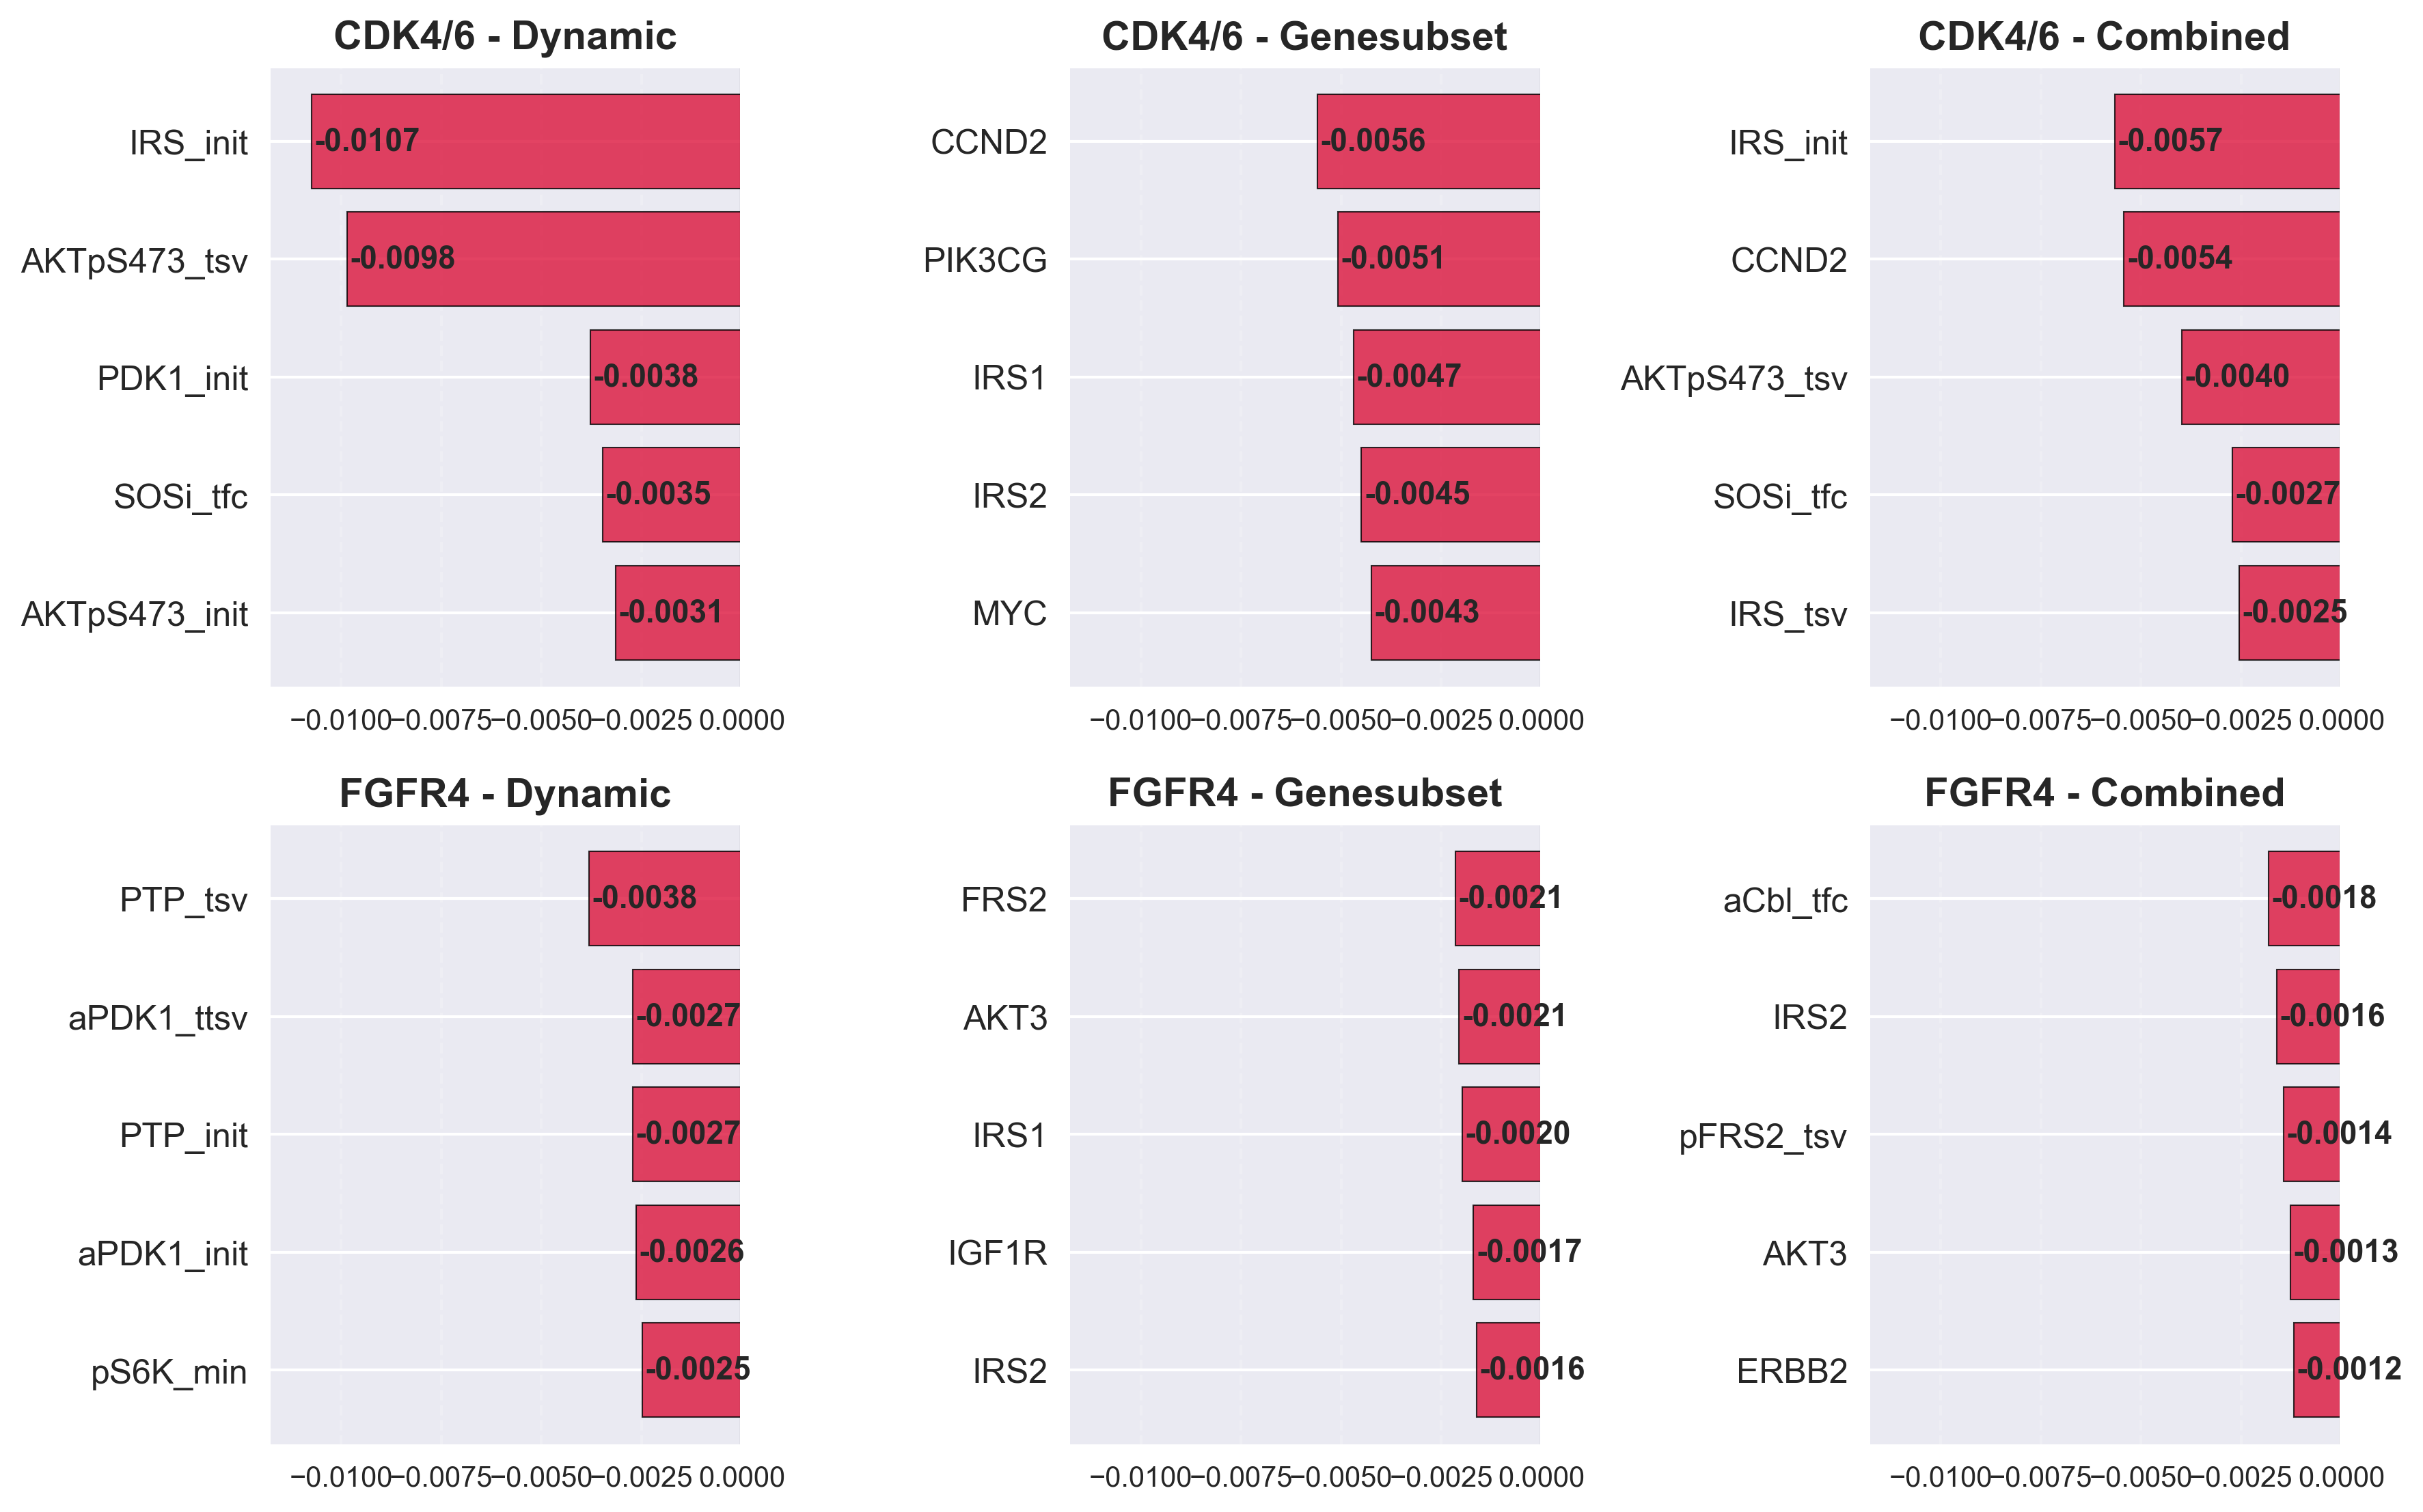

✓ Created negative effect matrix plot
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/shap_negative_matrix_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
✓ Completed negative matrix plot creation


In [12]:
save_and_print("## PLOT 2: Negative Effect Comparative Matrix Plot (2×3 Grid)", print_report_file, level="section")
def create_negative_matrix_plot(signed_consensus_data, file_save_path, exp_id):
    """
    Create a 2×3 matrix plot showing top 5 negative-impact features across all experimental conditions.
    
    Args:
        signed_consensus_data: DataFrame with signed SHAP values
        file_save_path: Path to save the plot
        exp_id: Experiment identifier for filename
    """
    save_and_print("### Creating Negative Effect Matrix Plot", print_report_file, level="subsection")
    
    if not isinstance(signed_consensus_data, pd.DataFrame):
        save_and_print("Invalid data format for negative matrix plot", print_report_file, level="info")
        return
    
    # Extract all conditions
    conditions = signed_consensus_data.index.get_level_values(0).unique()
    
    # Define networks and dataset types for the 2×3 grid
    networks = ['cdk46', 'fgfr4']
    dataset_types = ['dynamic', 'genesubset', 'combined']
    
    # Set up publication-quality styling
    plt.style.use('seaborn-v0_8')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.linewidth'] = 1.2
    
    # Create 2×3 subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), dpi=300)
    # fig.suptitle('Negative Impact Feature Comparison Across Datasets\n(Top 5 Features per Condition)', 
    #              fontsize=16, fontweight='bold', y=0.95)
    
    # Color scheme
    negative_color = '#dc143c'  # Crimson Red
    context_color = '#d3d3d3'   # Light Gray
    
    # Track global x-axis limits for consistent scaling
    global_x_min = float('inf')
    global_x_max = float('-inf')
    
    # Prepare data for each subplot
    subplot_data = {}
    
    for i, network in enumerate(networks):
        for j, dataset_type in enumerate(dataset_types):
            # Find matching condition
            matching_conditions = [cond for cond in conditions 
                                  if network in cond and dataset_type in cond]
            
            if matching_conditions:
                # Use the first matching condition
                condition = matching_conditions[0]
                condition_data = signed_consensus_data.xs(condition, level=0, drop_level=False)
                
                # Get top 5 negative features (most negative first)
                negative_effects = condition_data[condition_data['mean_importance_signed'] < 0]
                top_5_negative = negative_effects.nsmallest(5, 'mean_importance_signed')
                
                if len(top_5_negative) > 0:
                    # Sort for visualization (most negative first - descending order)
                    top_5_negative = top_5_negative.sort_values('mean_importance_signed', ascending=True)
                    
                    # Update global limits (negative values)
                    current_min = top_5_negative['mean_importance_signed'].min()
                    global_x_min = min(global_x_min, current_min * 1.1)
                    global_x_max = max(global_x_max, 0)  # Ensure zero is visible
                    
                    subplot_data[(i, j)] = {
                        'data': top_5_negative,
                        'condition': condition,
                        'network': network,
                        'dataset_type': dataset_type
                    }
    
    # Apply consistent scaling and create plots
    for (i, j), plot_info in subplot_data.items():
        ax = axes[i, j]
        data = plot_info['data']
        
        # Create horizontal bars for negative effects
        # Use reversed y_pos to put most negative on top
        y_pos = range(len(data))
        values = data['mean_importance_signed'].values
        feature_names = [str(feat) for feat in data.index.get_level_values(1)]
        
        # Plot bars (negative values extend leftward)
        bars = ax.barh(y_pos, values, color=negative_color, alpha=0.8, 
                      edgecolor='black', linewidth=0.5)
        
        # Set y-axis labels - use original order but show from top to bottom
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names, fontsize=12)
        
        # ✅ FIX: Invert y-axis to show most negative features on top
        ax.invert_yaxis()
        
        # Set consistent x-axis limits
        ax.set_xlim(global_x_min, global_x_max)
        
        # Add value labels (to the right of negative bars)
        for idx, (y, value) in enumerate(zip(y_pos, values)):
            ax.text(value + (global_x_max - global_x_min) * 0.005, y, 
                   f'{value:.4f}', va='center', fontsize=11, fontweight='bold')
        
        # Add grid and zero line
        ax.grid(axis='x', alpha=0.2, linestyle='--')
        ax.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
        
        # Set subplot title
        network_name = 'CDK4/6' if plot_info['network'] == 'cdk46' else 'FGFR4'
        dataset_name = plot_info['dataset_type'].title()
        ax.set_title(f'{network_name} - {dataset_name}', fontsize=14, fontweight='bold')
        
        # Set x-axis label for bottom row
        # if i == 1:
        #     ax.set_xlabel('Mean Signed SHAP Value', fontsize=12)
        
        # # Set y-axis label for first column
        # if j == 0:
        #     ax.set_ylabel('Feature', fontsize=12)
    
    # Hide empty subplots
    for i in range(2):
        for j in range(3):
            if (i, j) not in subplot_data:
                axes[i, j].set_visible(False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the plot
    plot_filename = f"{file_save_path}shap_negative_matrix_{exp_id}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print(f"✓ Created negative effect matrix plot", print_report_file, level="info")
    save_and_print(f"  Plot saved to: {plot_filename}", print_report_file, level="info")
    
    return fig

# Create negative matrix plot
if 'shap_consensus_importance_signed' in datasets:
    try:
        negative_matrix_fig = create_negative_matrix_plot(
            datasets['shap_consensus_importance_signed'], file_save_path, exp_id)
        save_and_print("✓ Completed negative matrix plot creation", print_report_file, level="info")
    except Exception as e:
        save_and_print(f"❌ Error creating negative matrix plot: {str(e)}", print_report_file, level="info")
else:
    save_and_print("No data available for negative matrix plot", print_report_file, level="info")

## PLOT 3: CDK4/6 Network - Feature Importance Comparison (Isolation vs Combined)
### Creating CDK4/6 Network Mirrored Bar Chart


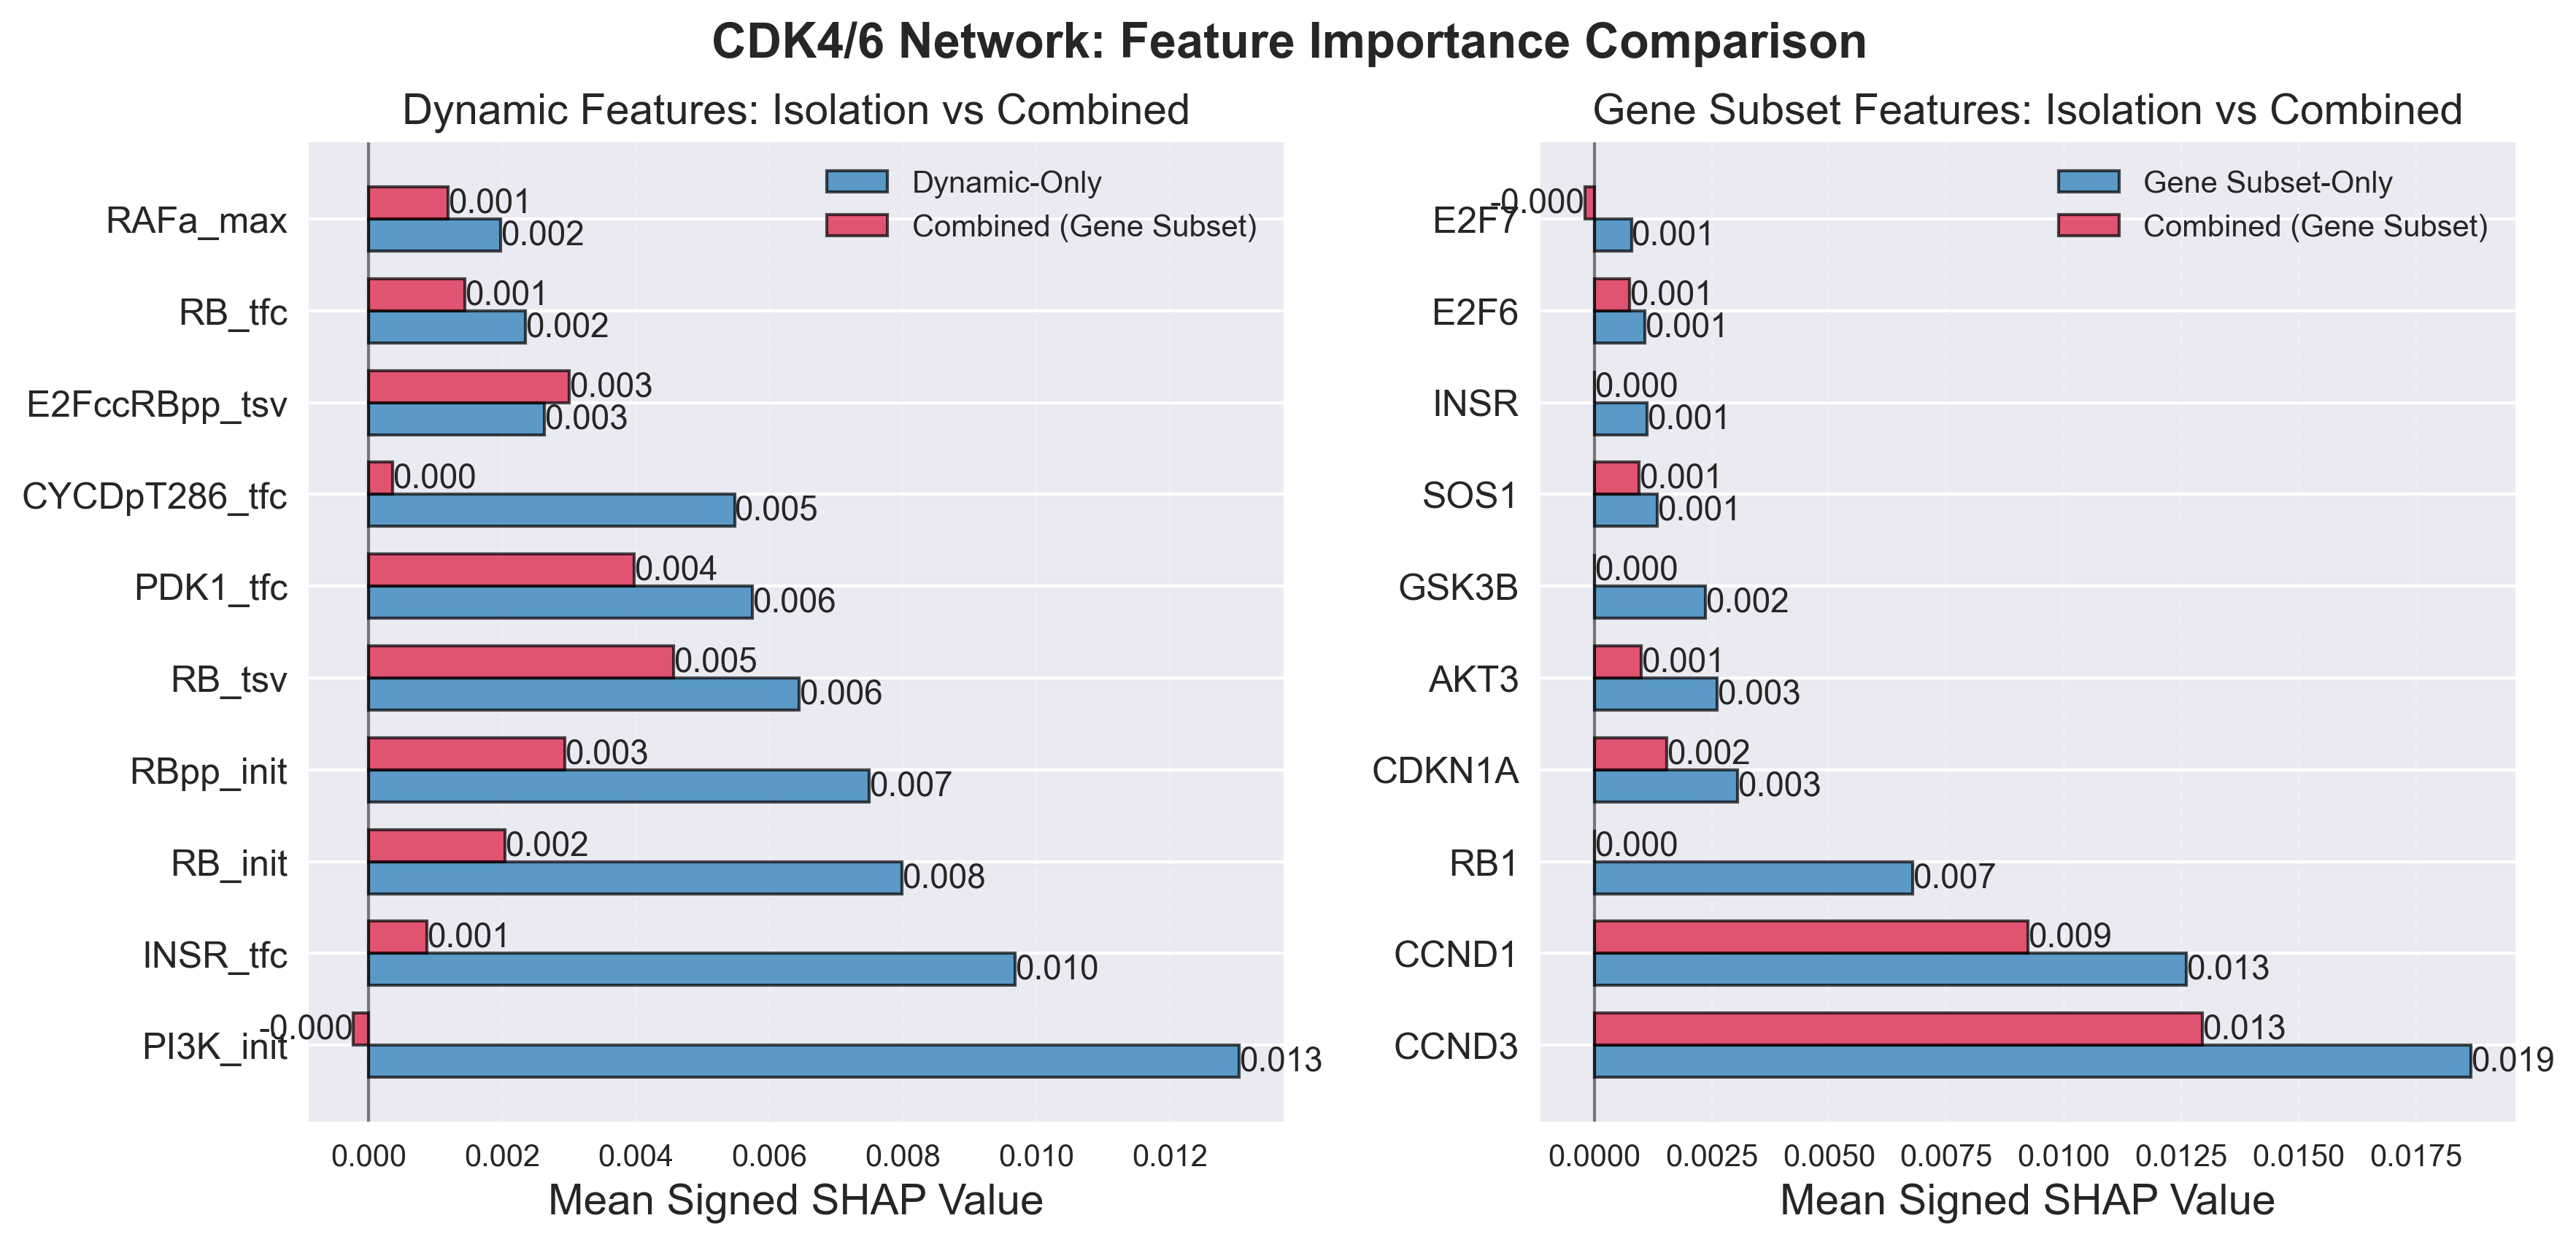

✓ Created CDK4/6 network mirrored bar chart
  Plot saved to: G:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/mirrored_barchart_cdk46_v1_rf_config1_genesubsets_shap_seeds20_batch4.png
✓ Completed CDK4/6 network mirrored bar chart creation


In [13]:
save_and_print("## PLOT 3: CDK4/6 Network - Feature Importance Comparison (Isolation vs Combined)", print_report_file, level="section")

def create_cdk46_mirrored_barchart(signed_consensus_data, file_save_path, exp_id):
    """
    Create mirrored bar chart comparison for CDK4/6 network showing dynamic and RNA-seq features
    in isolation vs combined contexts.
    """
    save_and_print("### Creating CDK4/6 Network Mirrored Bar Chart", print_report_file, level="subsection")
    
    if not isinstance(signed_consensus_data, pd.DataFrame):
        save_and_print("Invalid data format for mirrored bar chart", print_report_file, level="info")
        return
    
    # Extract conditions for CDK4/6 network
    cdk46_conditions = [cond for cond in signed_consensus_data.index.get_level_values(0).unique() 
                       if 'cdk46' in cond]
    
    # Separate conditions by dataset type
    dynamic_condition = next((cond for cond in cdk46_conditions if 'dynamic' in cond), None)
    genesubset_condition = next((cond for cond in cdk46_conditions if 'genesubset' in cond), None)
    combined_condition = next((cond for cond in cdk46_conditions if 'combined' in cond), None)
    
    if not all([dynamic_condition, genesubset_condition, combined_condition]):
        save_and_print("Missing required conditions for CDK4/6 comparison", print_report_file, level="info")
        return
    
    # Set up publication-quality styling
    plt.style.use('seaborn-v0_8')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.size'] = 14
    
    # Create figure with 1 row, 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
    fig.suptitle('CDK4/6 Network: Feature Importance Comparison', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    # Color schemes
    positive_color = '#1f77b4'  # Blue for positive
    negative_color = '#dc143c'  # Red for negative
    
    # Panel 1: Dynamic Features Comparison
    ax1.set_title('Dynamic Features: Isolation vs Combined', fontsize=14)
    
    # Get top dynamic features from dynamic-only condition
    dynamic_data = signed_consensus_data.xs(dynamic_condition, level=0, drop_level=False)
    top_dynamic_features = dynamic_data.nlargest(10, 'mean_importance_signed').index.get_level_values(1)
    
    # Prepare data for mirrored bar chart
    dynamic_comparison_data = []
    for feature in top_dynamic_features:
        # Get importance in dynamic-only context
        dynamic_importance = dynamic_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in dynamic_data.index.get_level_values(1) else 0
        
        # Get importance in combined context
        combined_data = signed_consensus_data.xs(combined_condition, level=0, drop_level=False)
        combined_importance = combined_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in combined_data.index.get_level_values(1) else 0
        
        dynamic_comparison_data.append({
            'feature': feature,
            'dynamic_only': dynamic_importance,
            'combined': combined_importance
        })
    
    # Create mirrored bar chart for dynamic features
    y_pos = np.arange(len(dynamic_comparison_data))
    bar_height = 0.35
    
    # Plot bars for dynamic-only (left) and combined (right)
    dynamic_values = [data['dynamic_only'] for data in dynamic_comparison_data]
    combined_values = [data['combined'] for data in dynamic_comparison_data]
    
    bars1 = ax1.barh(y_pos - bar_height/2, dynamic_values, bar_height, 
                    color=positive_color, alpha=0.7, label='Dynamic-Only', 
                    edgecolor='black', linewidth=1)
    bars2 = ax1.barh(y_pos + bar_height/2, combined_values, bar_height, 
                    color=negative_color, alpha=0.7, label='Combined (Gene Subset)', 
                    edgecolor='black', linewidth=1)
    
    # Add value labels
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        ax1.text(width1, bar1.get_y() + bar1.get_height()/2, f'{width1:.3f}', 
                ha='left' if width1 >= 0 else 'right', va='center', fontsize=11)
        ax1.text(width2, bar2.get_y() + bar2.get_height()/2, f'{width2:.3f}', 
                ha='left' if width2 >= 0 else 'right', va='center', fontsize=11)
    
    # Customize the plot
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([data['feature'] for data in dynamic_comparison_data], fontsize=12)
    ax1.set_xlabel('Mean Signed SHAP Value', fontsize=14)
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax1.legend(loc='upper right')
    ax1.grid(axis='x', alpha=0.2, linestyle='--')
    
    # Panel 2: RNA-seq Features Comparison
    ax2.set_title('Gene Subset Features: Isolation vs Combined', fontsize=14)
    
    # Get top gene subset features from gene subset-only condition
    genesubset_data = signed_consensus_data.xs(genesubset_condition, level=0, drop_level=False)
    top_genesubset_features = genesubset_data.nlargest(10, 'mean_importance_signed').index.get_level_values(1)
    
    # Prepare data for mirrored bar chart
    genesubset_comparison_data = []
    for feature in top_genesubset_features:
        # Get importance in gene subset-only context
        genesubset_importance = genesubset_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in genesubset_data.index.get_level_values(1) else 0
        
        # Get importance in combined context
        combined_importance = combined_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in combined_data.index.get_level_values(1) else 0
        
        genesubset_comparison_data.append({
            'feature': feature,
            'genesubset_only': genesubset_importance,
            'combined': combined_importance
        })
    
    # Create mirrored bar chart for gene subset features
    y_pos = np.arange(len(genesubset_comparison_data))
    
    # Plot bars for gene subset-only (left) and combined (right)
    genesubset_values = [data['genesubset_only'] for data in genesubset_comparison_data]
    combined_values = [data['combined'] for data in genesubset_comparison_data]
    
    bars1 = ax2.barh(y_pos - bar_height/2, genesubset_values, bar_height, 
                    color=positive_color, alpha=0.7, label='Gene Subset-Only', 
                    edgecolor='black', linewidth=1)
    bars2 = ax2.barh(y_pos + bar_height/2, combined_values, bar_height, 
                    color=negative_color, alpha=0.7, label='Combined (Gene Subset)', 
                    edgecolor='black', linewidth=1)
    
    # Add value labels
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        ax2.text(width1, bar1.get_y() + bar1.get_height()/2, f'{width1:.3f}', 
                ha='left' if width1 >= 0 else 'right', va='center', fontsize=11)
        ax2.text(width2, bar2.get_y() + bar2.get_height()/2, f'{width2:.3f}', 
                ha='left' if width2 >= 0 else 'right', va='center', fontsize=11)
    
    # Customize the plot
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([data['feature'] for data in genesubset_comparison_data], fontsize=12)
    ax2.set_xlabel('Mean Signed SHAP Value', fontsize=14)
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax2.legend(loc='upper right')
    ax2.grid(axis='x', alpha=0.2, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plot_filename = f"{file_save_path}mirrored_barchart_cdk46_{exp_id}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print(f"✓ Created CDK4/6 network mirrored bar chart", print_report_file, level="info")
    save_and_print(f"  Plot saved to: {plot_filename}", print_report_file, level="info")
    
    return fig

# Create CDK4/6 mirrored bar chart comparison
if 'shap_consensus_importance_signed' in datasets:
    try:
        cdk46_mirrored_fig = create_cdk46_mirrored_barchart(
            datasets['shap_consensus_importance_signed'], file_save_path, exp_id)
        save_and_print("✓ Completed CDK4/6 network mirrored bar chart creation", print_report_file, level="info")
    except Exception as e:
        save_and_print(f"❌ Error creating CDK4/6 network mirrored bar chart: {str(e)}", print_report_file, level="info")
else:
    save_and_print("No data available for CDK4/6 network comparison", print_report_file, level="info")

In [ ]:
save_and_print("## PLOT 4: FGFR4 Network - Feature Importance Comparison (Isolation vs Combined)", print_report_file, level="section")

def create_fgfr4_mirrored_barchart(signed_consensus_data, file_save_path, exp_id):
    """
    Create mirrored bar chart comparison for FGFR4 network showing dynamic and RNA-seq features
    in isolation vs combined contexts.
    """
    save_and_print("### Creating FGFR4 Network Mirrored Bar Chart", print_report_file, level="subsection")
    
    if not isinstance(signed_consensus_data, pd.DataFrame):
        save_and_print("Invalid data format for FGFR4 mirrored bar chart", print_report_file, level="info")
        return
    
    # Extract conditions for FGFR4 network [1]
    fgfr4_conditions = [cond for cond in signed_consensus_data.index.get_level_values(0).unique() 
                       if 'fgfr4' in cond]
    
    # Separate conditions by dataset type [1]
    dynamic_condition = next((cond for cond in fgfr4_conditions if 'dynamic' in cond), None)
    genesubset_condition = next((cond for cond in fgfr4_conditions if 'genesubset' in cond), None)
    combined_condition = next((cond for cond in fgfr4_conditions if 'combined' in cond), None)
    
    if not all([dynamic_condition, genesubset_condition, combined_condition]):
        save_and_print("Missing required conditions for FGFR4 comparison", print_report_file, level="info")
        return
    
    # Set up publication-quality styling [1]
    plt.style.use('seaborn-v0_8')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.size'] = 14
    
    # Create figure with 1 row, 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
    fig.suptitle('FGFR4 Network: Feature Importance Comparison', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    # Color schemes
    positive_color = '#1f77b4'  # Blue for positive
    negative_color = '#dc143c'  # Red for negative
    
    # Panel 1: Dynamic Features Comparison
    ax1.set_title('Dynamic Features: Isolation vs Combined', fontsize=14)
    
    # Get top dynamic features from dynamic-only condition [1]
    dynamic_data = signed_consensus_data.xs(dynamic_condition, level=0, drop_level=False)
    top_dynamic_features = dynamic_data.nlargest(10, 'mean_importance_signed').index.get_level_values(1)
    
    # Prepare data for mirrored bar chart
    dynamic_comparison_data = []
    for feature in top_dynamic_features:
        # Get importance in dynamic-only context
        dynamic_importance = dynamic_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in dynamic_data.index.get_level_values(1) else 0
        
        # Get importance in combined context
        combined_data = signed_consensus_data.xs(combined_condition, level=0, drop_level=False)
        combined_importance = combined_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in combined_data.index.get_level_values(1) else 0
        
        dynamic_comparison_data.append({
            'feature': feature,
            'dynamic_only': dynamic_importance,
            'combined': combined_importance
        })
    
    # Create mirrored bar chart for dynamic features
    y_pos = np.arange(len(dynamic_comparison_data))
    bar_height = 0.35
    
    # Plot bars for dynamic-only (left) and combined (right)
    dynamic_values = [data['dynamic_only'] for data in dynamic_comparison_data]
    combined_values = [data['combined'] for data in dynamic_comparison_data]
    
    bars1 = ax1.barh(y_pos - bar_height/2, dynamic_values, bar_height, 
                    color=positive_color, alpha=0.7, label='Dynamic-Only', 
                    edgecolor='black', linewidth=1)
    bars2 = ax1.barh(y_pos + bar_height/2, combined_values, bar_height, 
                    color=negative_color, alpha=0.7, label='Combined (Gene Subset)', 
                    edgecolor='black', linewidth=1)
    
    # Add value labels
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        ax1.text(width1, bar1.get_y() + bar1.get_height()/2, f'{width1:.3f}', 
                ha='left' if width1 >= 0 else 'right', va='center', fontsize=11)
        ax1.text(width2, bar2.get_y() + bar2.get_height()/2, f'{width2:.3f}', 
                ha='left' if width2 >= 0 else 'right', va='center', fontsize=11)
    
    # Customize the plot
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([data['feature'] for data in dynamic_comparison_data], fontsize=12)
    ax1.set_xlabel('Mean Signed SHAP Value', fontsize=14)
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax1.legend(loc='upper right')
    ax1.grid(axis='x', alpha=0.2, linestyle='--')
    
    # Panel 2: RNA-seq Features Comparison
    ax2.set_title('Gene Subset Features: Isolation vs Combined', fontsize=14)
    
    # Get top gene subset features from gene subset-only condition [1]
    genesubset_data = signed_consensus_data.xs(genesubset_condition, level=0, drop_level=False)
    top_genesubset_features = genesubset_data.nlargest(10, 'mean_importance_signed').index.get_level_values(1)
    
    # Prepare data for mirrored bar chart
    genesubset_comparison_data = []
    for feature in top_genesubset_features:
        # Get importance in gene subset-only context
        genesubset_importance = genesubset_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in genesubset_data.index.get_level_values(1) else 0
        
        # Get importance in combined context
        combined_importance = combined_data.xs(feature, level=1)['mean_importance_signed'].iloc[0] if feature in combined_data.index.get_level_values(1) else 0
        
        genesubset_comparison_data.append({
            'feature': feature,
            'genesubset_only': genesubset_importance,
            'combined': combined_importance
        })
    
    # Create mirrored bar chart for gene subset features
    y_pos = np.arange(len(genesubset_comparison_data))
    
    # Plot bars for gene subset-only (left) and combined (right)
    genesubset_values = [data['genesubset_only'] for data in genesubset_comparison_data]
    combined_values = [data['combined'] for data in genesubset_comparison_data]
    
    bars1 = ax2.barh(y_pos - bar_height/2, genesubset_values, bar_height, 
                    color=positive_color, alpha=0.7, label='Gene Subset-Only', 
                    edgecolor='black', linewidth=1)
    bars2 = ax2.barh(y_pos + bar_height/2, combined_values, bar_height, 
                    color=negative_color, alpha=0.7, label='Combined (Gene Subset)', 
                    edgecolor='black', linewidth=1)
    
    # Add value labels
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        ax2.text(width1, bar1.get_y() + bar1.get_height()/2, f'{width1:.3f}', 
                ha='left' if width1 >= 0 else 'right', va='center', fontsize=11)
        ax2.text(width2, bar2.get_y() + bar2.get_height()/2, f'{width2:.3f}', 
                ha='left' if width2 >= 0 else 'right', va='center', fontsize=11)
    
    # Customize the plot
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([data['feature'] for data in genesubset_comparison_data], fontsize=12)
    ax2.set_xlabel('Mean Signed SHAP Value', fontsize=12)
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    ax2.legend(loc='upper right')
    ax2.grid(axis='x', alpha=0.2, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plot_filename = f"{file_save_path}mirrored_barchart_fgfr4_{exp_id}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print(f"✓ Created FGFR4 network mirrored bar chart", print_report_file, level="info")
    save_and_print(f"  Plot saved to: {plot_filename}", print_report_file, level="info")
    
    return fig

# Create FGFR4 mirrored bar chart comparison
if 'shap_consensus_importance_signed' in datasets:
    try:
        fgfr4_mirrored_fig = create_fgfr4_mirrored_barchart(
            datasets['shap_consensus_importance_signed'], file_save_path, exp_id)
        save_and_print("✓ Completed FGFR4 network mirrored bar chart creation", print_report_file, level="info")
    except Exception as e:
        save_and_print(f"❌ Error creating FGFR4 network mirrored bar chart: {str(e)}", print_report_file, level="info")
else:
    save_and_print("No data available for FGFR4 network comparison", print_report_file, level="info")

## PLOT 4: FGFR4 Network - Feature Importance Comparison (Isolation vs Combined)
### Creating FGFR4 Network Mirrored Bar Chart


## Section 9: Report Completion

In [ ]:
# Close the report file
print_report_file.close()
save_and_print(f"Analysis report saved to: {print_report_path}", level="info")

# Final completion message
save_and_print("Feature importance analysis completed successfully! The markdown report has been generated with comprehensive dataset analysis.", level="info")

Analysis report saved to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult-FeatureImportanceGeneSubsets-SHAP/v1_rf_config1_genesubsets_shap_seeds20_batch4/feature_importance_post_analysis_report_v1_rf_config1_genesubsets_shap_seeds20_batch4.md
Feature importance analysis completed successfully! The markdown report has been generated with comprehensive dataset analysis.


'Feature importance analysis completed successfully! The markdown report has been generated with comprehensive dataset analysis.'